## Download dataset

In [15]:
from urllib.request import urlretrieve
import os
import zipfile

In [19]:
# make directory
output_relative_dir = '../data/raw/'

if not os.path.exists(output_relative_dir):
    os.makedirs(output_relative_dir)
    

target_dir = 'PTV DATA'
if not os.path.exists(output_relative_dir + target_dir):
    os.makedirs(output_relative_dir + target_dir)

# download file
url = 'https://s3-ap-southeast-2.amazonaws.com/cl-isd-prd-datashare-s3-delivery/Order_WVQZRB.zip' 

print(f"Begin download PTV data")
output_dir = f'{output_relative_dir}{target_dir}/'
zip_path, _ = urlretrieve(url)
print(f"complete download PTV data")

# unzip
print(f"Begin unzip PTV data")
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(output_dir)
print(f"complete unzip PTV data")

Begin download PTV data
complete download PTV data


## Analysis

In [1]:
import fiona
import geopandas as gpd
import pandas as pd

In [2]:
ptv_layers = fiona.listlayers('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb')

### tram

In [3]:
gdf_METRO_TRAM = gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_METRO_TRAM_STOP')

df_vic_TRAM = pd.DataFrame(gdf_METRO_TRAM)

df_vic_TRAM['suburb'] = df_vic_TRAM['STOP_NAME'].str.extract(r'(\(.*\))')
df_vic_TRAM['suburb'] = df_vic_TRAM['suburb'].str.extract(r'([^\(\)]+)')

# df_vic_TRAM.to_csv('processed_csv/tram.csv')

### train

In [4]:
gdf_REGIONAL_TRAIN= gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_REGIONAL_TRAIN_STATION')

gdf_METRO_TRAIN = gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_METRO_TRAIN_STATION')

df_mtrain_stops = pd.DataFrame({'STOP_ID': gdf_METRO_TRAIN['STOP_ID'], 'STOP_NAME': gdf_METRO_TRAIN['STOP_NAME'], 
'geometry': gdf_METRO_TRAIN['geometry'], 'type': pd.Series(["METRO_TRAIN" for x in range(len(gdf_METRO_TRAIN.index))])})

df_rtrain_stops = pd.DataFrame({'STOP_ID': gdf_REGIONAL_TRAIN['STOP_ID'], 'STOP_NAME': gdf_REGIONAL_TRAIN['STOP_NAME'],
'geometry': gdf_REGIONAL_TRAIN['geometry'], 'type': pd.Series(["REGIONAL_TRAIN" for x in range(len(gdf_REGIONAL_TRAIN.index))])})

df_train_stops = pd.concat([df_mtrain_stops, df_rtrain_stops], axis=0)

df_train_stops['suburb'] = df_train_stops['STOP_NAME'].str.extract(r'(\(.*\))')
df_train_stops['suburb'] = df_train_stops['suburb'].str.extract(r'([^\(\)]+)')

# df_train_stops.to_csv('processed_csv/train.csv')

### bus

In [5]:
gdf_REGIONAL_BUS= gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_REGIONAL_BUS_STOP')

gdf_METRO_BUS= gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_METRO_BUS_STOP')

gdf_SKYBUS= gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_SKYBUS_STOP')

gdf_REGIONAL_COACH= gpd.read_file('../data/raw/PTV DATA/ll_gda94/filegdb/whole_of_dataset/victoria/PUBLIC_TRANSPORT.gdb', 
layer='PTV_REGIONAL_COACH_STOP')

df_REGIONAL_BUS_stops = pd.DataFrame({'STOP_ID': gdf_REGIONAL_BUS['STOP_ID'], 'STOP_NAME': gdf_REGIONAL_BUS['STOP_NAME'], 
'geometry': gdf_REGIONAL_BUS['geometry'], 'type': pd.Series(["REGIONAL_BUS" for x in range(len(gdf_REGIONAL_BUS.index))])})

df_METRO_BUS = pd.DataFrame({'STOP_ID': gdf_METRO_BUS['STOP_ID'], 'STOP_NAME': gdf_METRO_BUS['STOP_NAME'], 
'geometry': gdf_METRO_BUS['geometry'], 'type': pd.Series(["METRO_BUS" for x in range(len(gdf_METRO_BUS.index))])})

df_SKYBUS = pd.DataFrame({'STOP_ID': gdf_SKYBUS['STOP_ID'], 'STOP_NAME': gdf_SKYBUS['STOP_NAME'], 
'geometry': gdf_SKYBUS['geometry'], 'type': pd.Series(["SKYBUS" for x in range(len(gdf_SKYBUS.index))])})

df_REGIONAL_COACH = pd.DataFrame({'STOP_ID': gdf_REGIONAL_COACH['STOP_ID'], 'STOP_NAME': gdf_REGIONAL_COACH['STOP_NAME'],
'geometry': gdf_REGIONAL_COACH['geometry'], 'type': pd.Series(["REGIONAL_COACH" for x in range(len(gdf_REGIONAL_COACH.index))])})

df_bus_stops = pd.concat([df_REGIONAL_BUS_stops, df_METRO_BUS, df_SKYBUS, df_REGIONAL_COACH], axis=0)

df_bus_stops['suburb'] = df_bus_stops['STOP_NAME'].str.extract(r'(\(.*\))')
df_bus_stops['suburb'] = df_bus_stops['suburb'].str.extract(r'([^\(\)]+)')

### stations counts

In [6]:
# convert suburb name to uppercase

df_bus_stops['suburb'] = df_bus_stops['suburb'].astype('string')
df_bus_stops['suburb'] = df_bus_stops['suburb'].str.upper()

df_train_stops['suburb'] = df_train_stops['suburb'].astype('string')
df_train_stops['suburb'] = df_train_stops['suburb'].str.upper()

df_vic_TRAM['suburb'] = df_vic_TRAM['suburb'].astype('string')
df_vic_TRAM['suburb'] = df_vic_TRAM['suburb'].str.upper()

In [7]:
# df_station_count = pd.DataFrame(gdf_vic['NAME'])
# df_station_count['NAME'] = df_station_count['NAME'].astype("string")

In [8]:
train_count = pd.DataFrame(
    {
        'NAME': df_train_stops['suburb'].value_counts().index,
        'train_counts': df_train_stops['suburb'].value_counts().values
        }
    )

tram_count = pd.DataFrame(
    {
        'NAME': df_vic_TRAM['suburb'].value_counts().index,
        'tram_counts': df_vic_TRAM['suburb'].value_counts().values
        }
    )

bus_count = pd.DataFrame(
    {
        'NAME': df_bus_stops['suburb'].value_counts().index,
        'bus_counts': df_bus_stops['suburb'].value_counts().values
        }
    )

In [9]:
from functools import reduce

df_station_count = reduce(lambda  left,right: pd.merge(left,right,on=['NAME'],
how='outer'), [train_count, tram_count, bus_count])

In [10]:
df_station_count['NAME'].loc[[0]] = 'MELBOURNE'

df_station_count['total_sc'] = df_station_count.iloc[:, 1:].sum(axis=1)

df_station_count = df_station_count.rename(columns={'NAME': 'suburb'})

In [12]:
df_station_count.to_csv('../data/curated/PTV_stations_count_by_suburb.csv')

In [13]:
# c. preprocess rent data
df_property = pd.read_csv('../data/raw/property.csv')
df_property.columns

df_property_filtered = df_property[['suburb', 'rent_price_', 'rent_date']]

df_property_filtered.dropna(inplace=True)

df_property_filtered['rent_date'] = pd.to_datetime(df_property_filtered['rent_date'])

min = pd.Timestamp('2013-01-01')
max = pd.Timestamp('2022-12-31')

df_property_filtered[(min<=df_property_filtered['rent_date']) & (df_property_filtered['rent_date'] <= max)]

df_property_filtered['rent_price_'] = df_property_filtered['rent_price_'].astype('str')
df_property_filtered['rent_price_'] = df_property_filtered['rent_price_'].str.extract(r'([0-9]+)')
df_property_filtered['rent_price_'] = df_property_filtered['rent_price_'].astype(float)

df_property_filtered['suburb'] = df_property_filtered['suburb'].str.upper()
df_property_filtered['Year'] = df_property_filtered['rent_date'].dt.year

/tmp/ipykernel_3907/88007167.py:2: DtypeWarning: Columns (5,6,7,10,11,16,18,22,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_property = pd.read_csv('../data/raw/property.csv')
/tmp/ipykernel_3907/88007167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_filtered.dropna(inplace=True)
/tmp/ipykernel_3907/88007167.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_property_filtered['rent_date'] = pd.to_datetime(df_property_filtered['rent_date'])
/tmp/ipykernel_3907/88007167.py:16: SettingWithCopyWarning: 
A 

In [14]:
df_merge = pd.merge(df_property_filtered, df_station_count, how='left', on='suburb')
df_merge_mean = df_merge.groupby(['suburb', 'Year']).mean().reset_index()

/tmp/ipykernel_3907/2913235409.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merge_mean = df_merge.groupby(['suburb', 'Year']).mean().reset_index()


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3088      0.086      3.579      0.000       0.140       0.478


Text(0.5, 1.0, '2022')

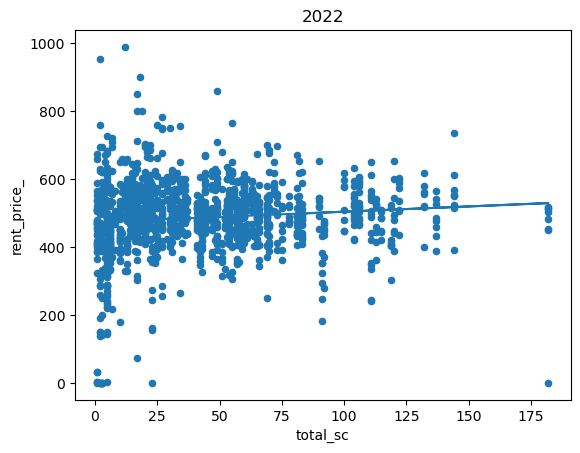

In [123]:
# fit linear regression model
X = df_plot[['total_sc', 'rent_price_']].dropna()['total_sc']
X = sm.add_constant(X)
y = df_plot[['total_sc', 'rent_price_']].dropna()['rent_price_']

model = sm.OLS(y,X)
results = model.fit()
    
# print hypothesis test result
print(results.t_test([0,1]))
    
# plot data
ax = df_plot[['total_sc', 'rent_price_']].dropna().plot(
x='total_sc', y='rent_price_', kind = 'scatter')
    
# plot lr model
X = df_plot[['total_sc', 'rent_price_']].dropna()['total_sc']
ax.plot(X, results.params.const + results.params.total_sc * X)
    
ax.set_title(label=str(year))

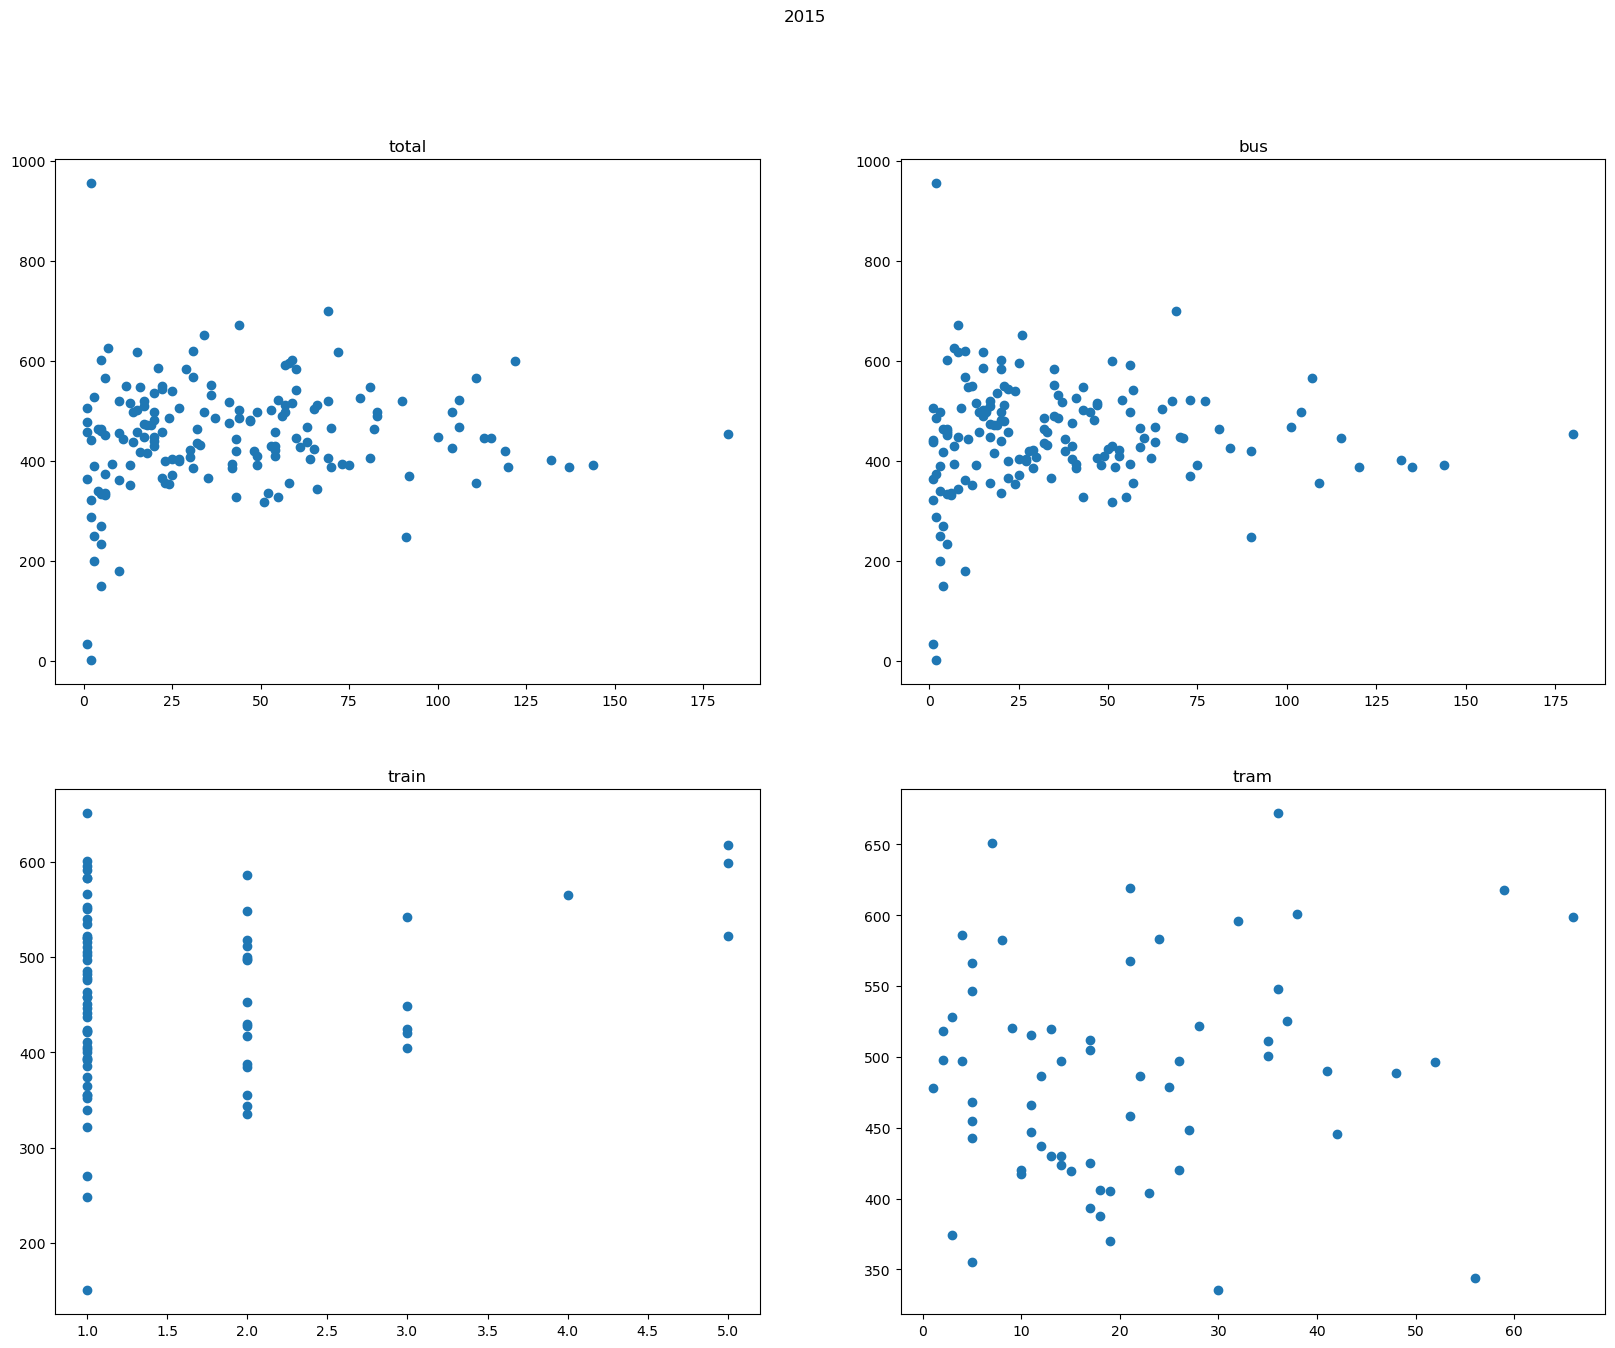

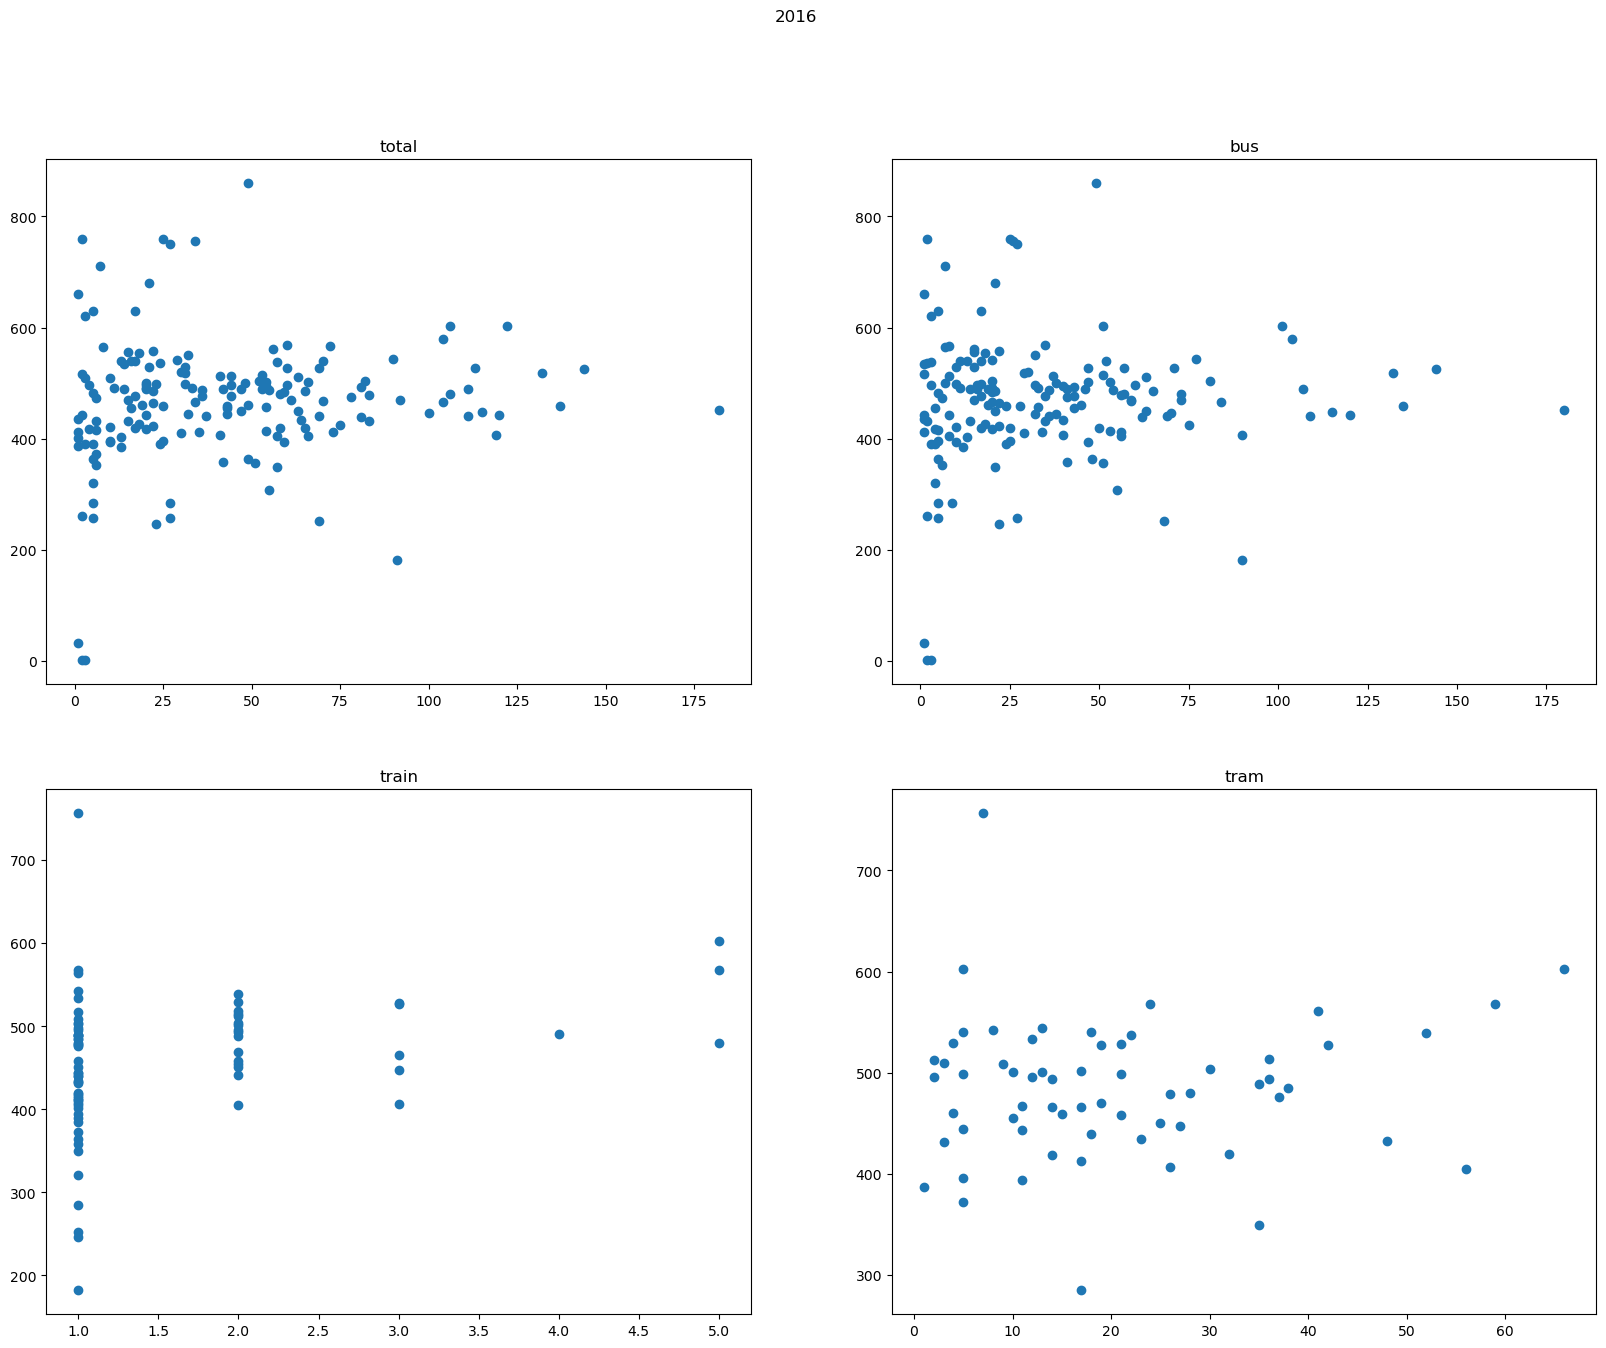

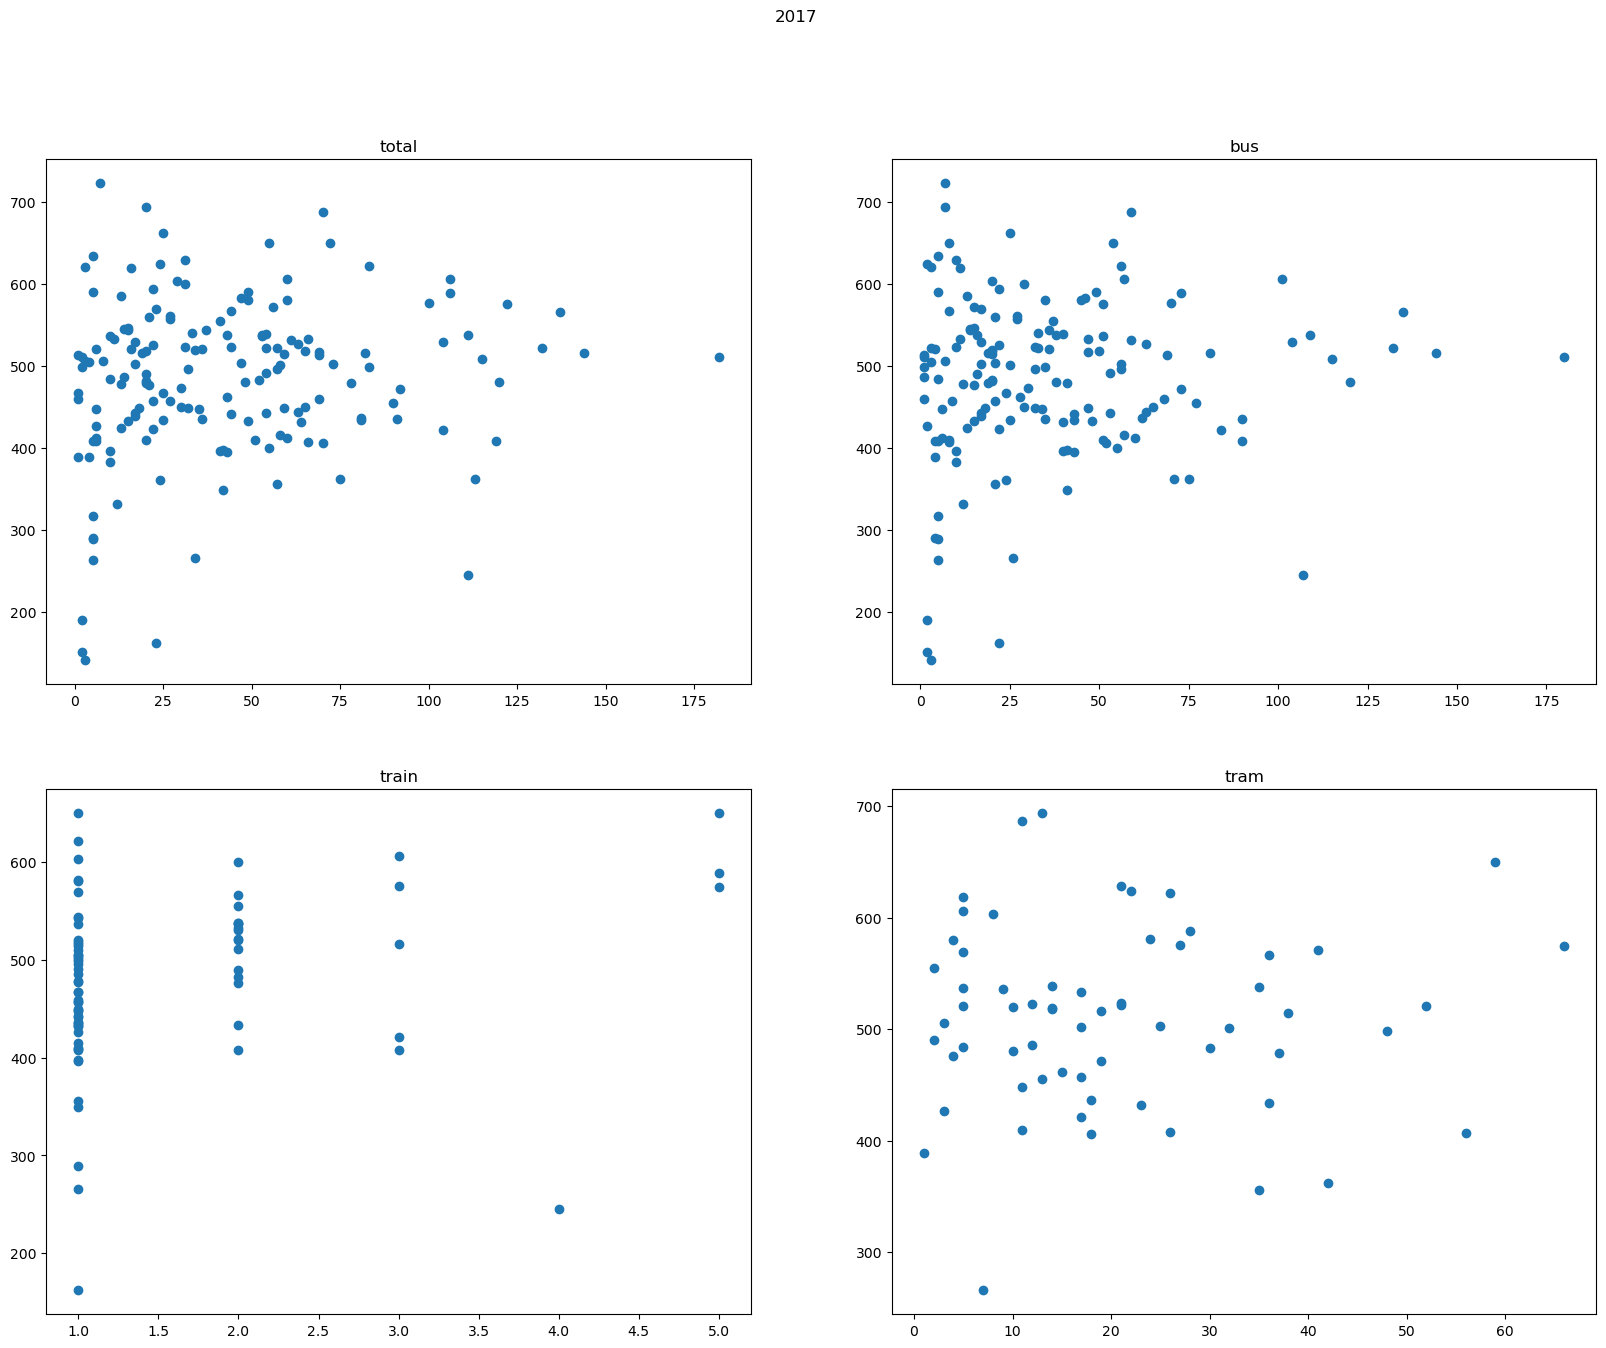

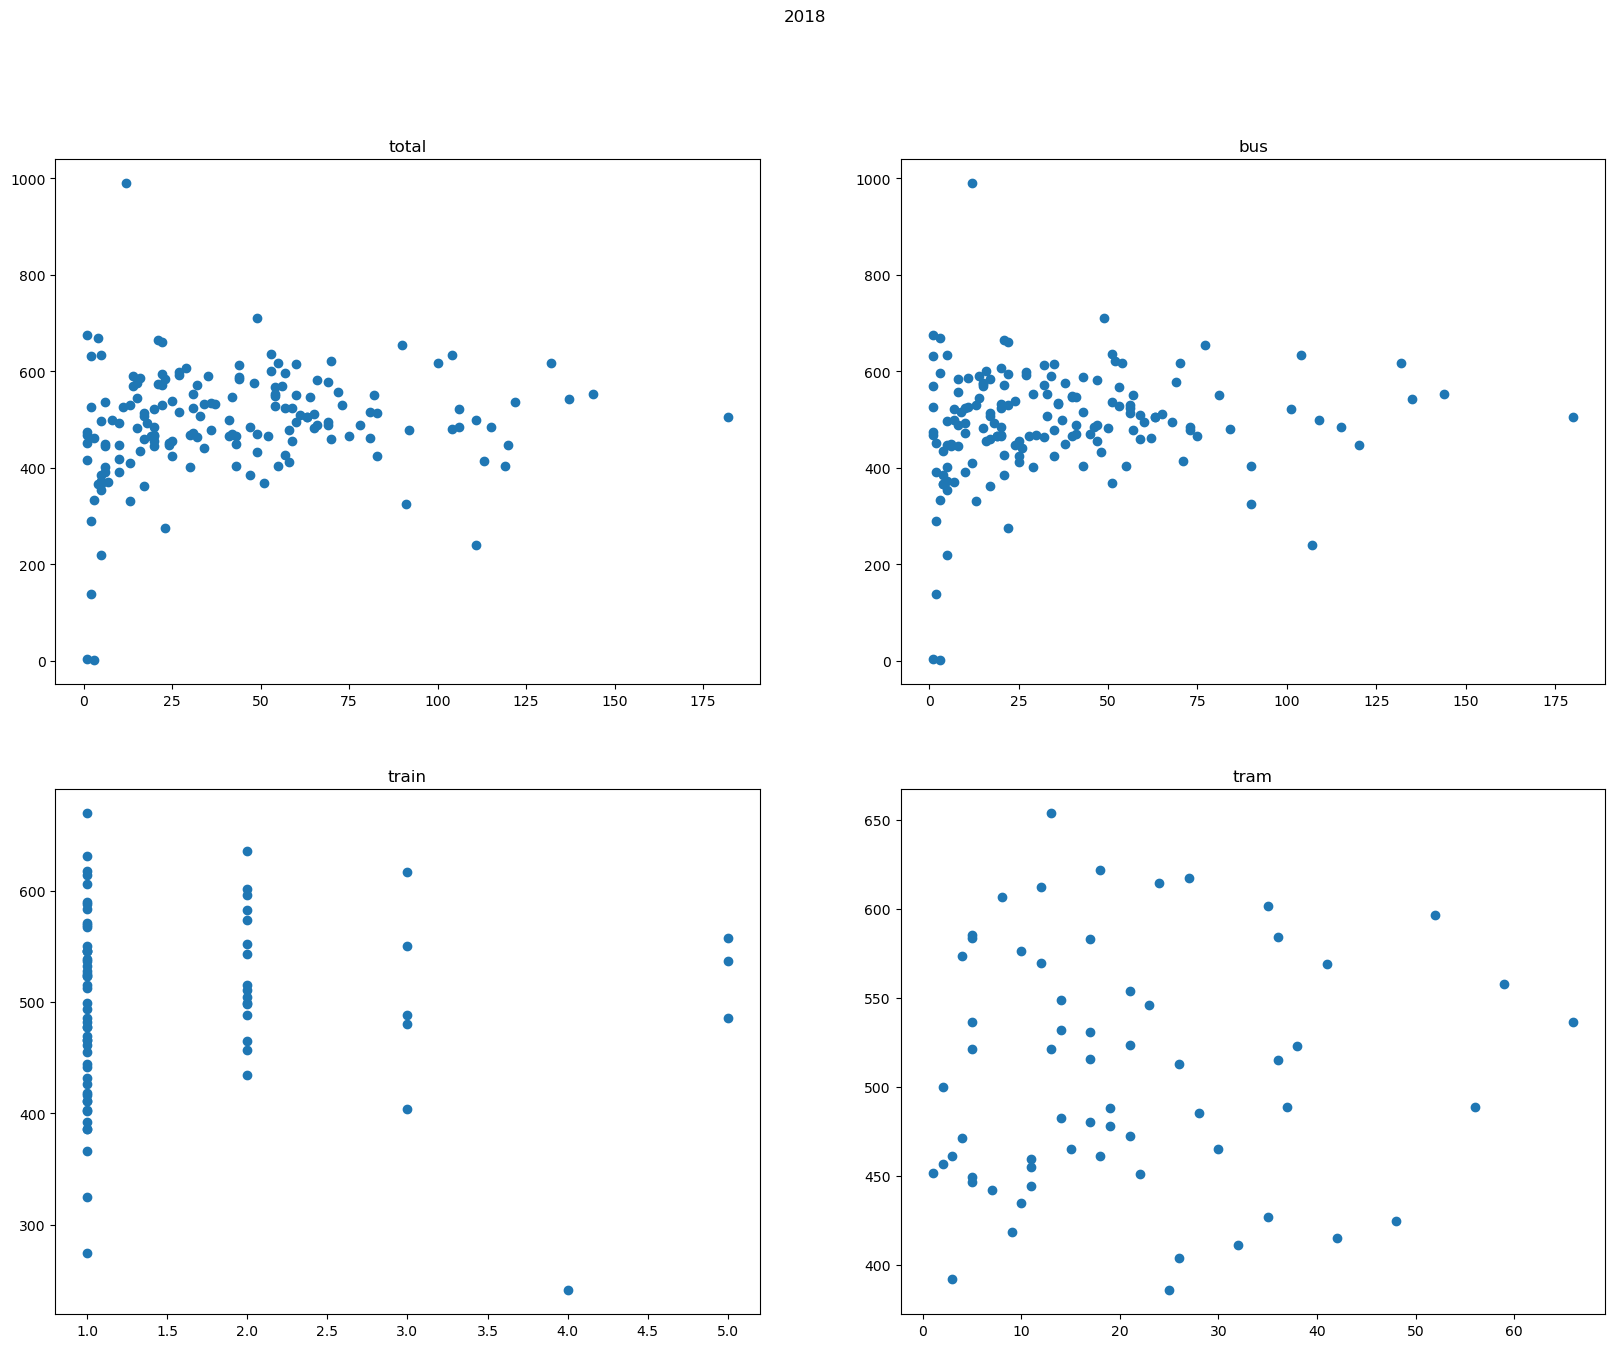

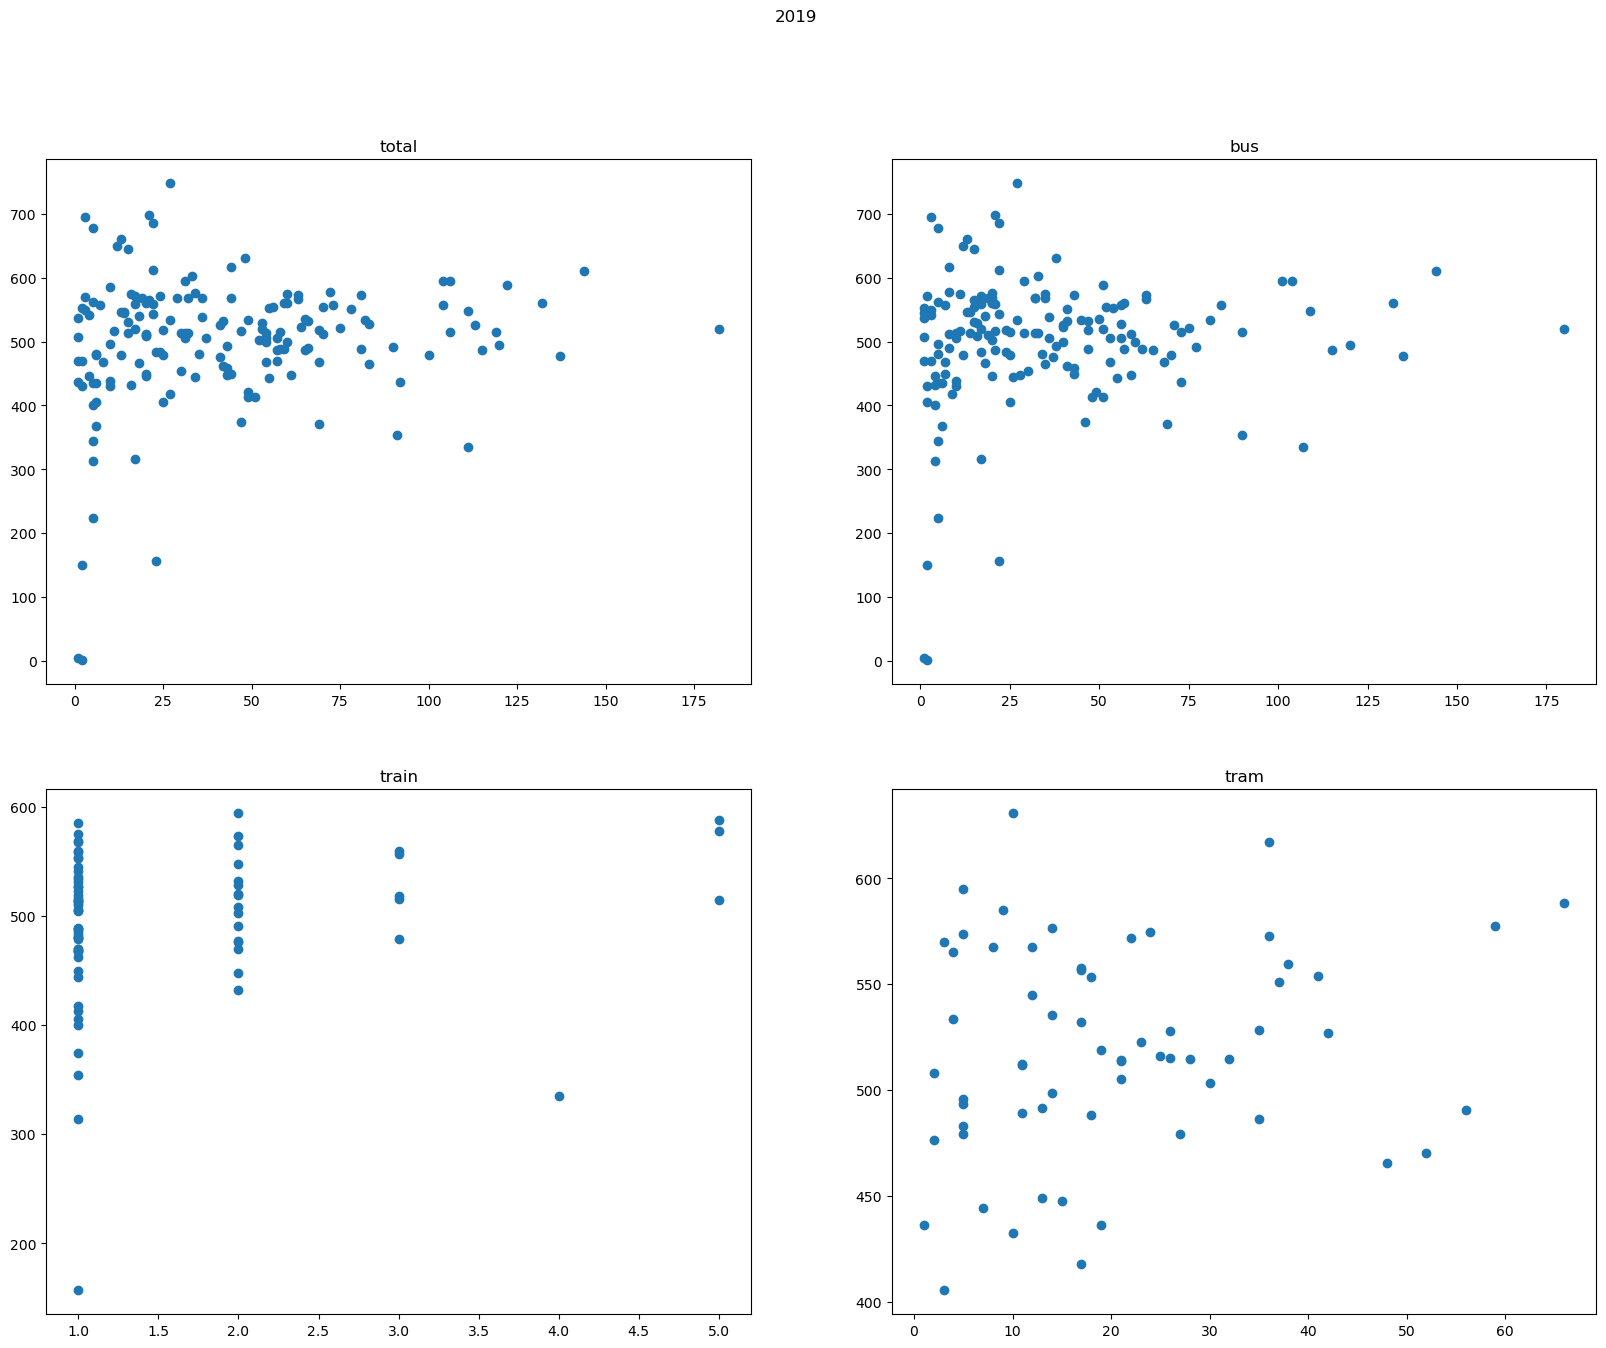

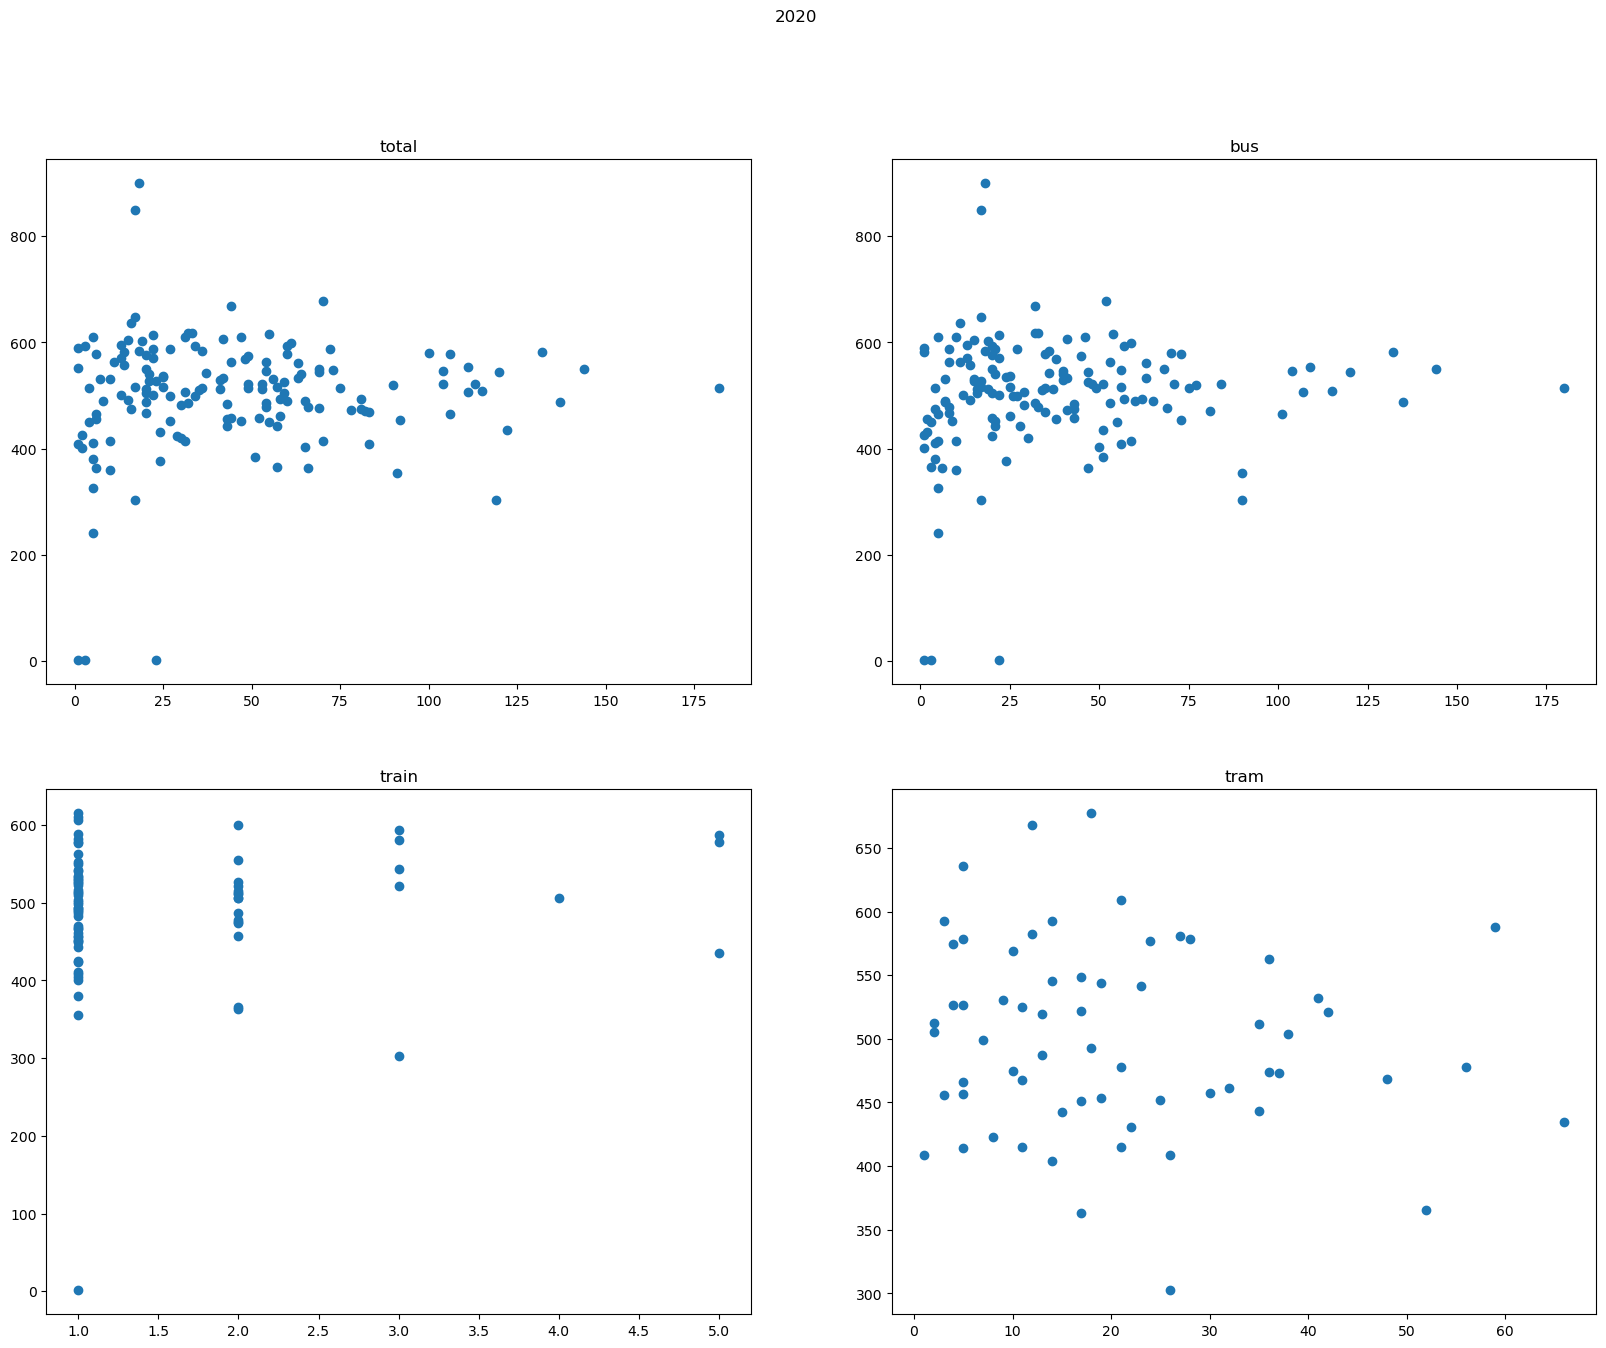

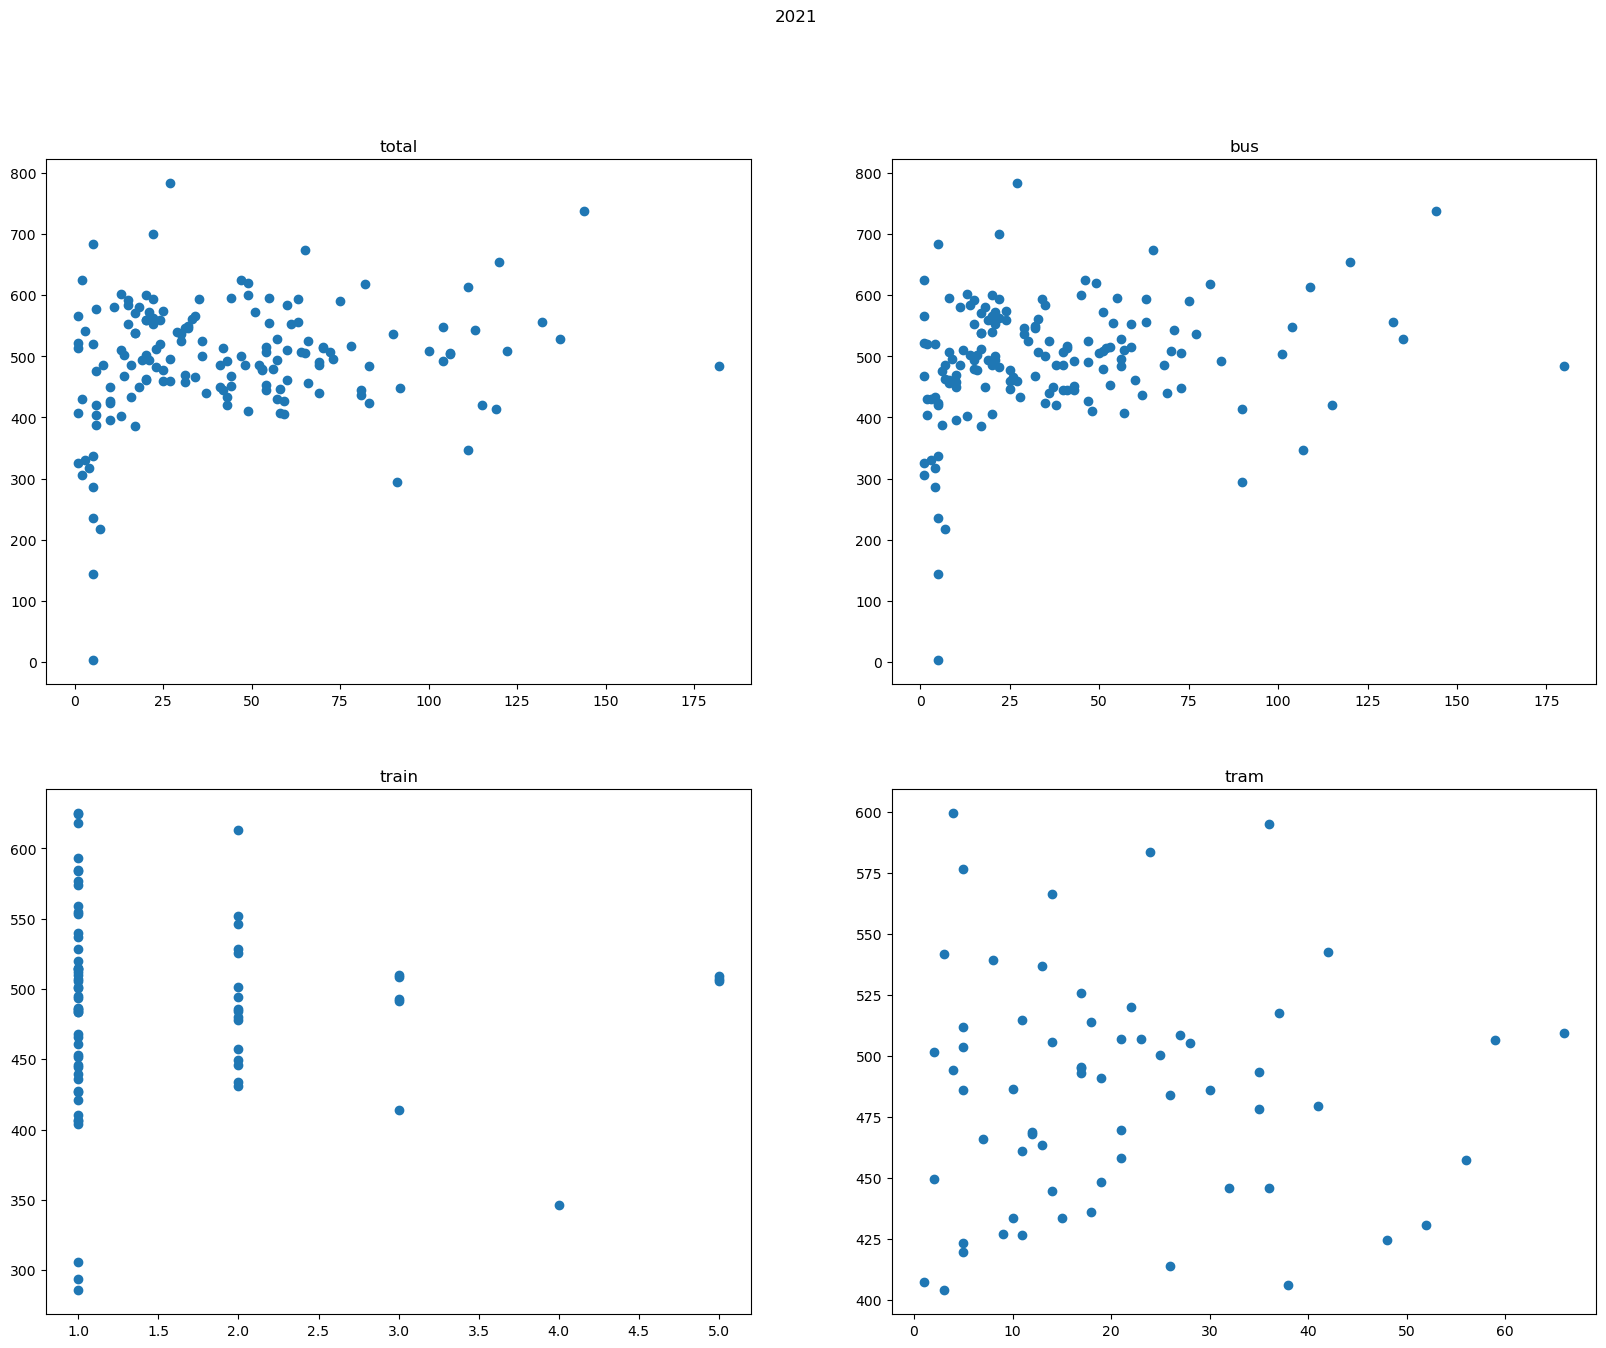

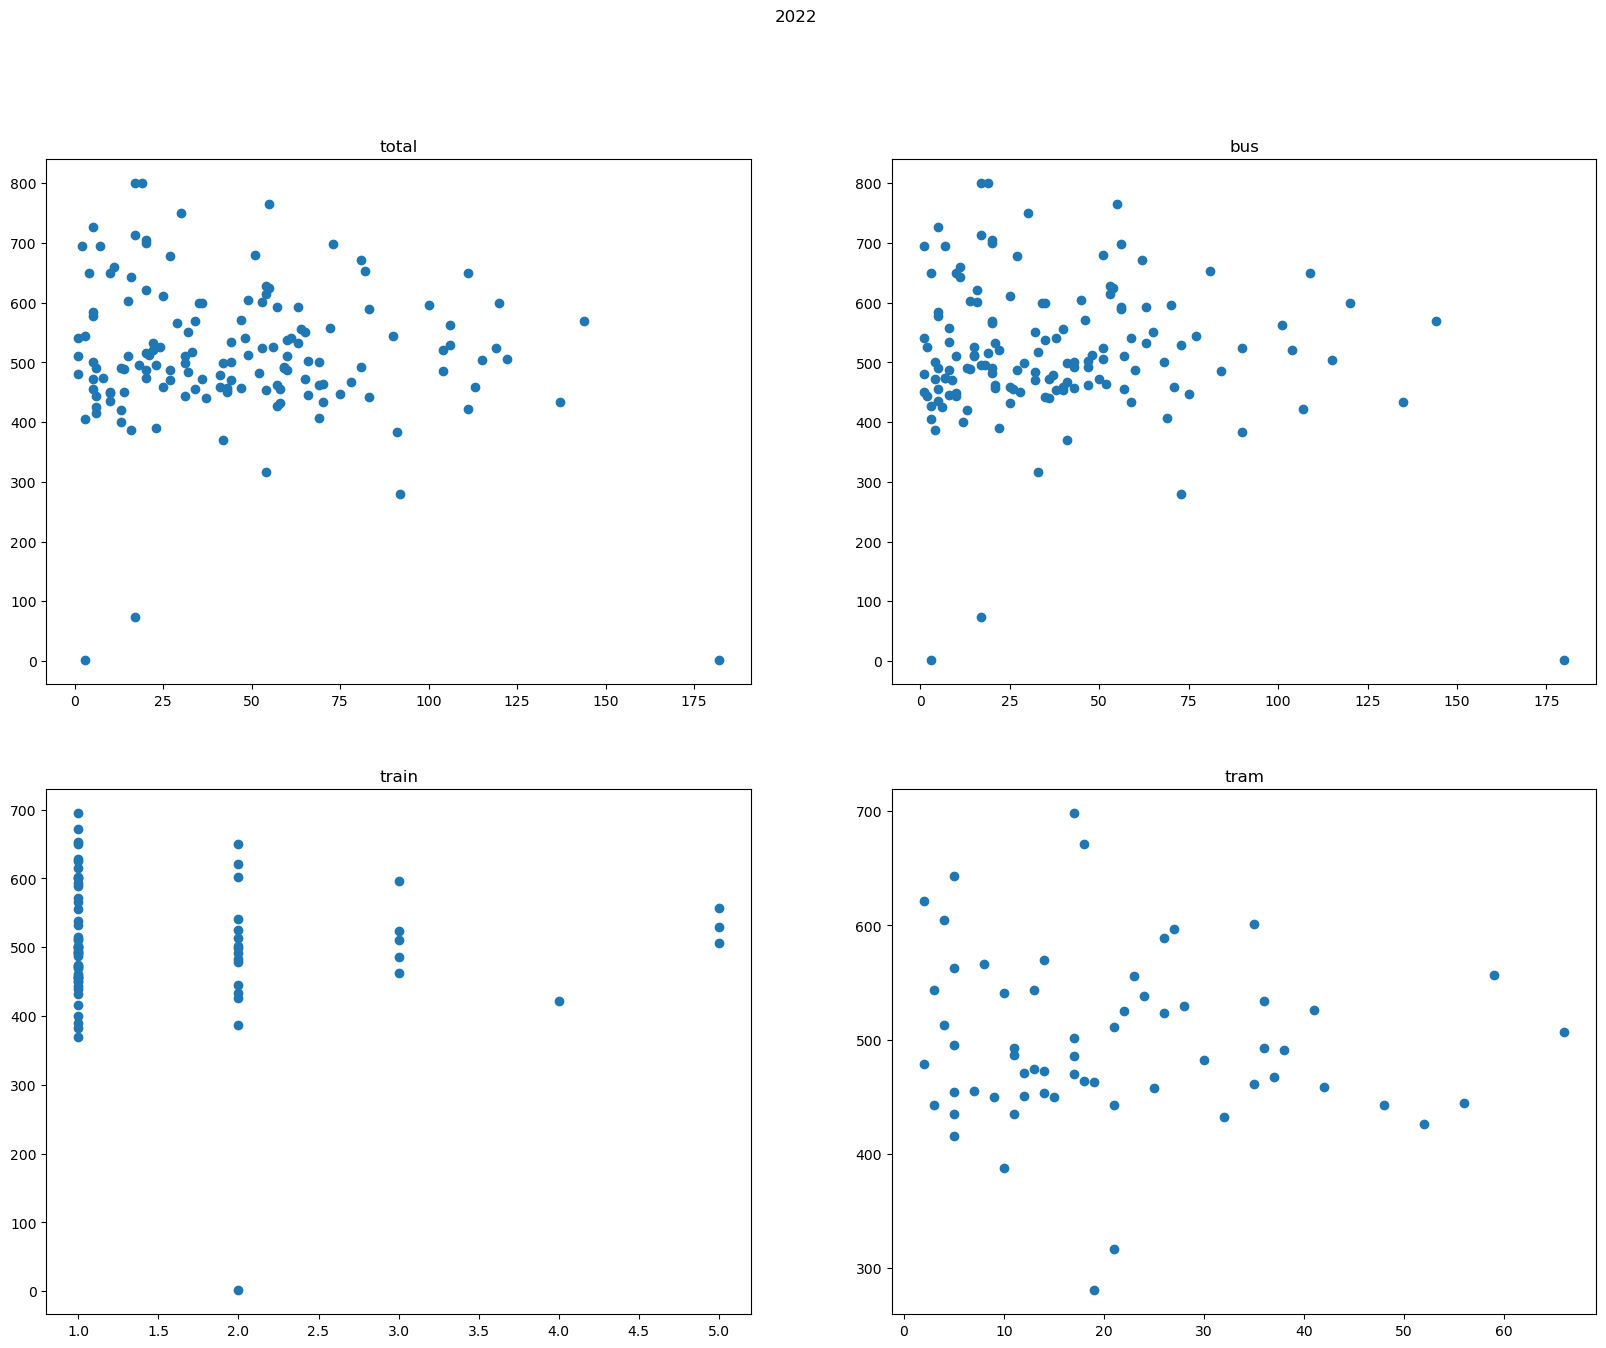

In [51]:
import matplotlib.pyplot as plt


df_plot = df_merge_mean[df_merge_mean['Year'] >=2015]

years = list(df_plot['Year'].unique())

for year in years:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
    
    
    axes[0][0].scatter(df_plot[df_plot['Year']==year]['total_sc'], 
                df_plot[df_plot['Year']==year]['rent_price_'])
    axes[0][0].set_title(label='total')
    
    axes[0][1].scatter(df_plot[df_plot['Year']==year]['bus_counts'].astype('float'), 
                df_plot[df_plot['Year']==year]['rent_price_'])
    axes[0][1].set_title(label='bus')
    
    
    axes[1][0].scatter(df_plot[df_plot['Year']==year]['train_counts'].astype('float'), 
                df_plot[df_plot['Year']==year]['rent_price_'])
    axes[1][0].set_title(label='train')
    
    
    axes[1][1].scatter(df_plot[df_plot['Year']==year]['tram_counts'].astype('float'), 
                df_plot[df_plot['Year']==year]['rent_price_'])
    axes[1][1].set_title(label='tram')
    
    fig.suptitle(str(year))
    
    plt.show()

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3414      0.242      1.409      0.161      -0.137       0.820
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3265      0.250      1.304      0.194      -0.168       0.821
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3816      0.218      1.747      0.082      -0.050       0.813
2018
                             Tes

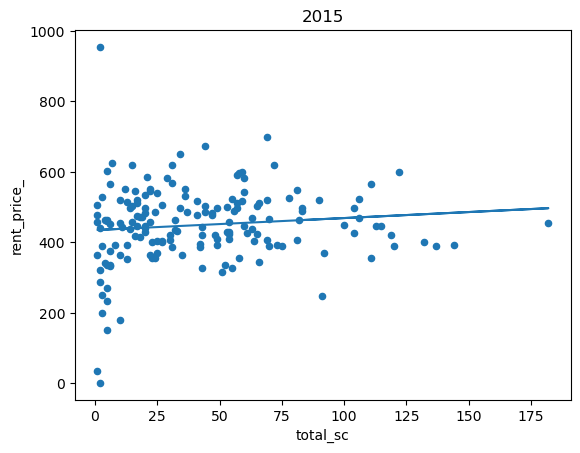

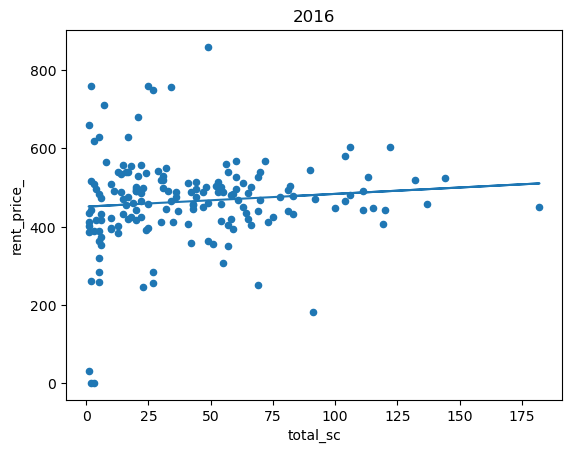

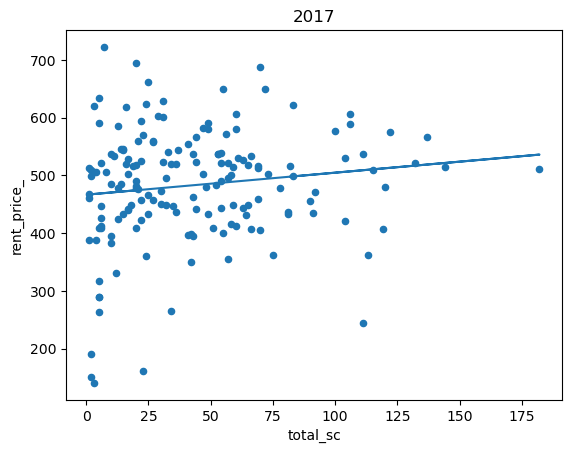

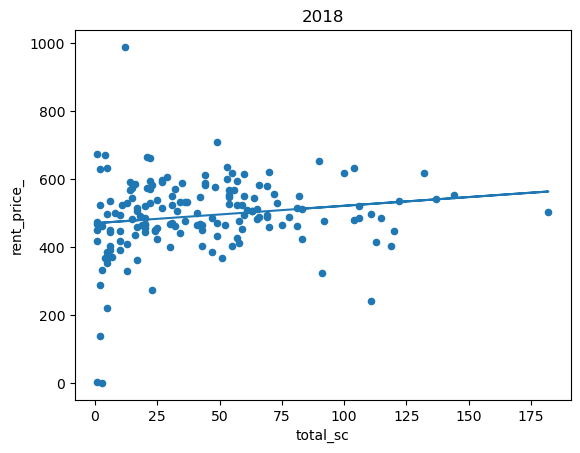

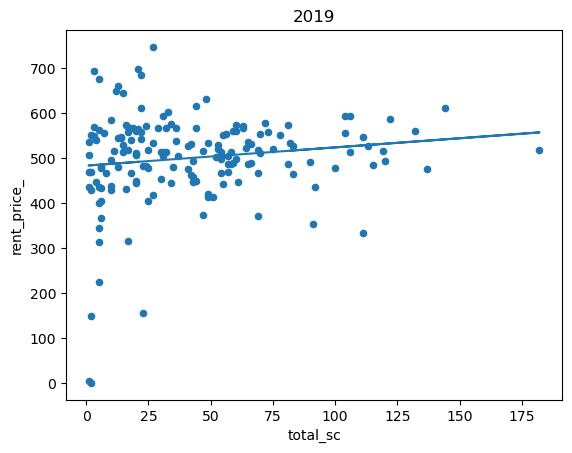

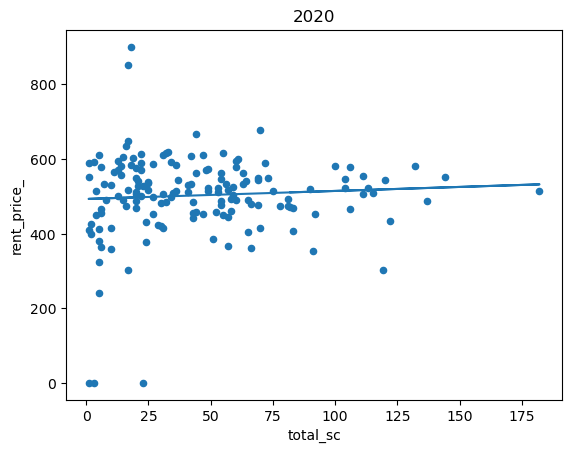

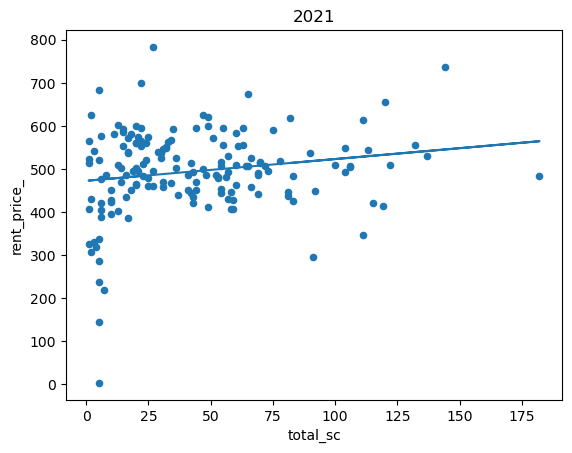

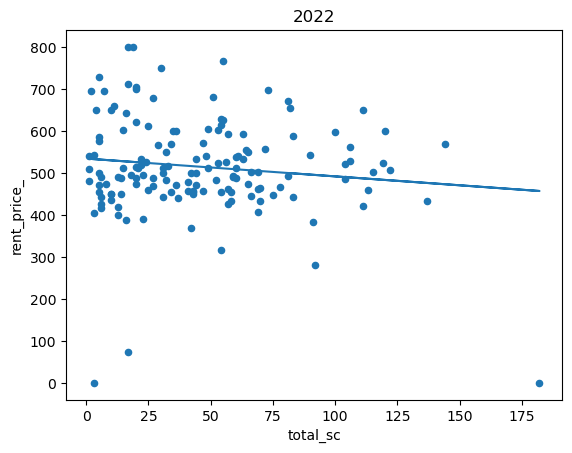

In [119]:
import statsmodels.api as sm


# linear regression for total counts

for year in years:
    # fit linear regression model
    X = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_']].dropna()['total_sc']
    X = sm.add_constant(X)
    y = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_']].dropna()['rent_price_']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_']].dropna().plot(
    x='total_sc', y='rent_price_', kind = 'scatter')
    
    # plot lr model
    X = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_']].dropna()['total_sc']
    ax.plot(X, results.params.const + results.params.total_sc * X)
    
    ax.set_title(label=str(year))
    
    

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.5499     10.785      1.998      0.049       0.060      43.040
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            26.5024      9.387      2.823      0.006       7.798      45.207
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.9407     10.181      2.155      0.034       1.654      42.228
2018
                             Tes

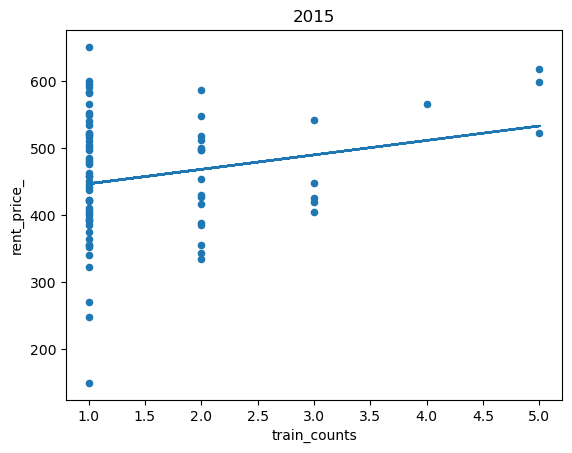

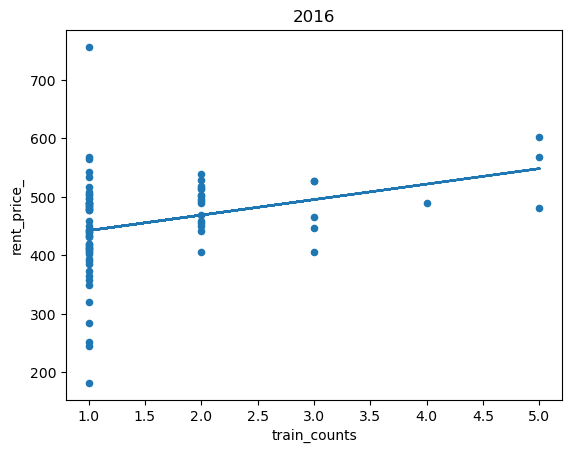

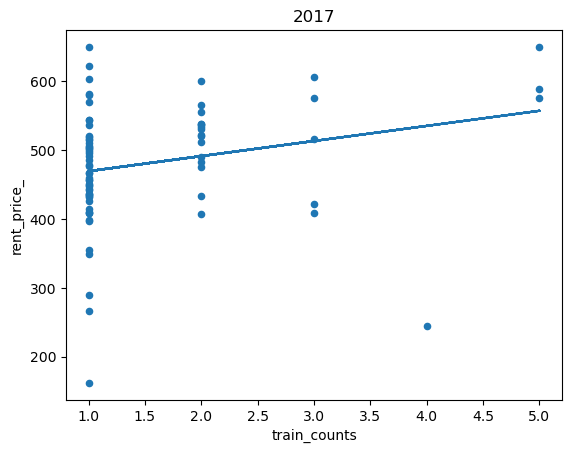

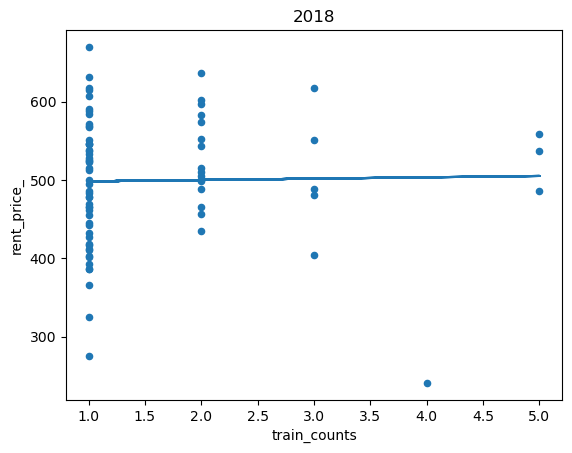

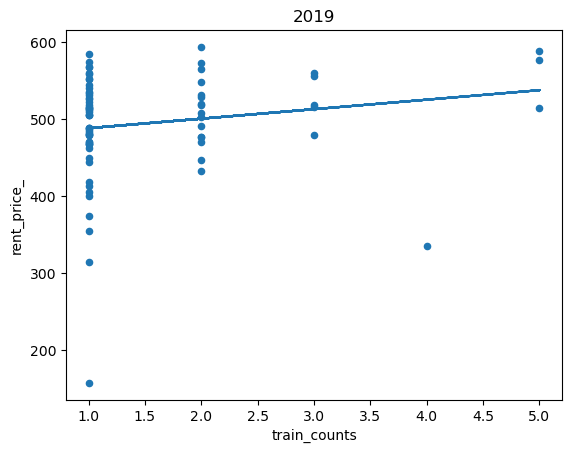

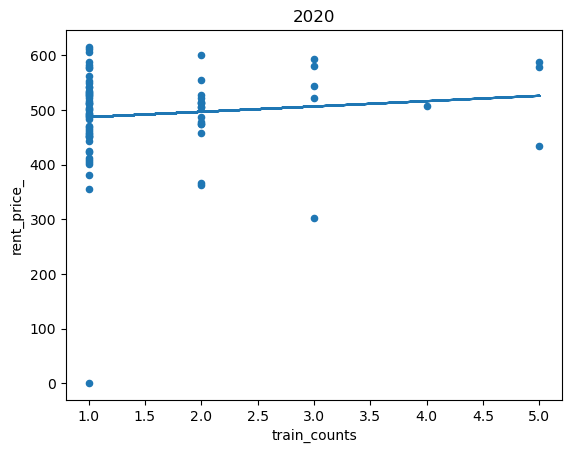

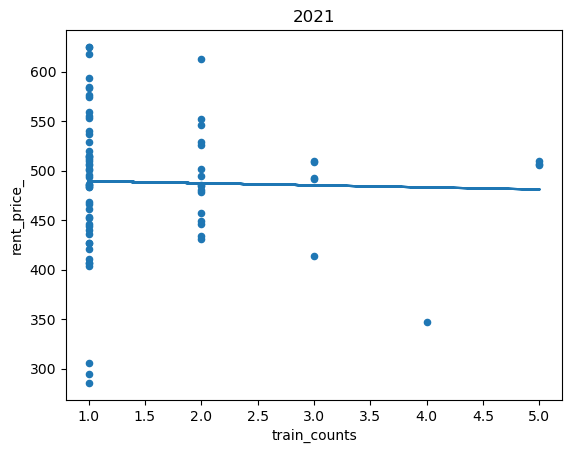

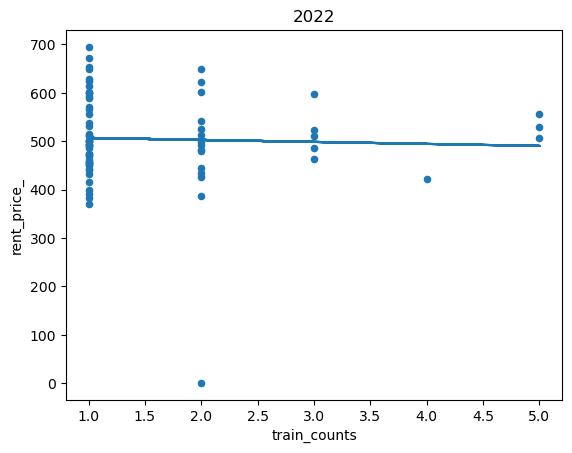

In [120]:
# linear regression for train_counts

for year in years:
    # fit linear regression model
    X = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_']].dropna()['train_counts'].astype('float')
    X = sm.add_constant(X)
    y = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_']].dropna()['rent_price_']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_']].dropna().plot(
    x='train_counts', y='rent_price_', kind = 'scatter')
    
    # plot lr model
    X = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_']].dropna()['train_counts']
    ax.plot(X, results.params.const + results.params.train_counts * X)
    
    ax.set_title(label=str(year))

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8448      0.633      1.335      0.187      -0.420       2.110
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3672      0.579      0.634      0.528      -0.791       1.525
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1191      0.681      0.175      0.862      -1.243       1.481
2018
                             Tes

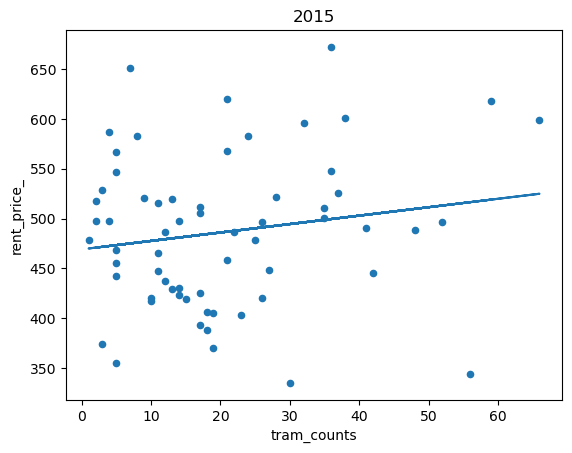

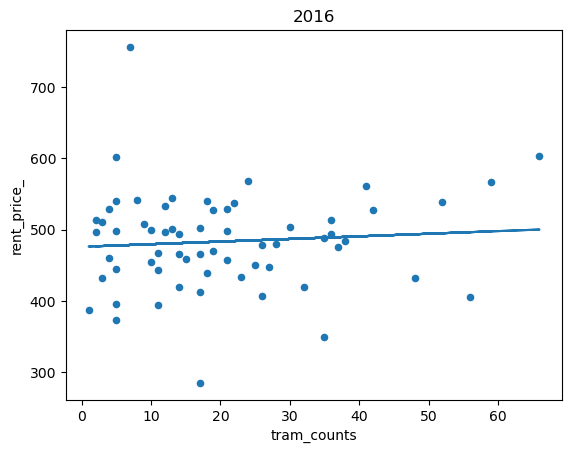

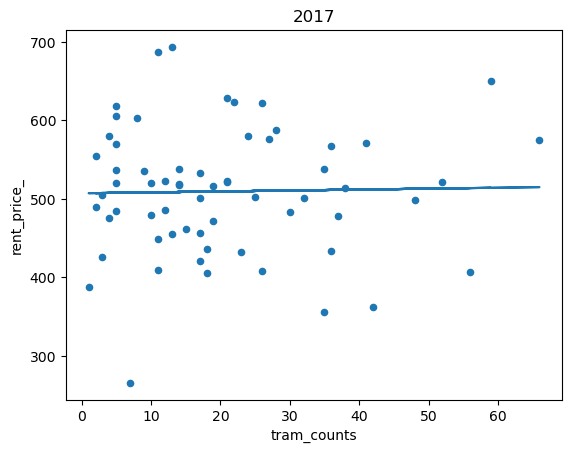

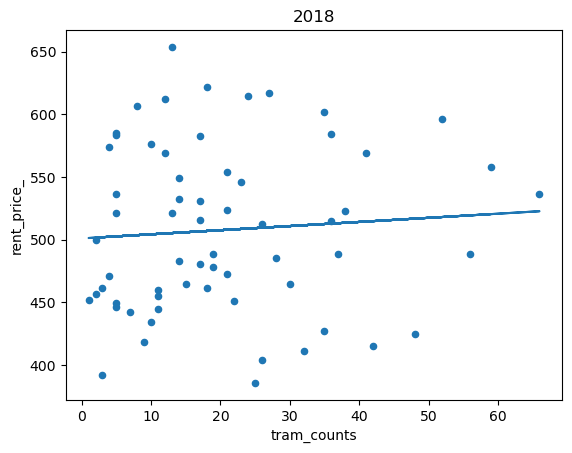

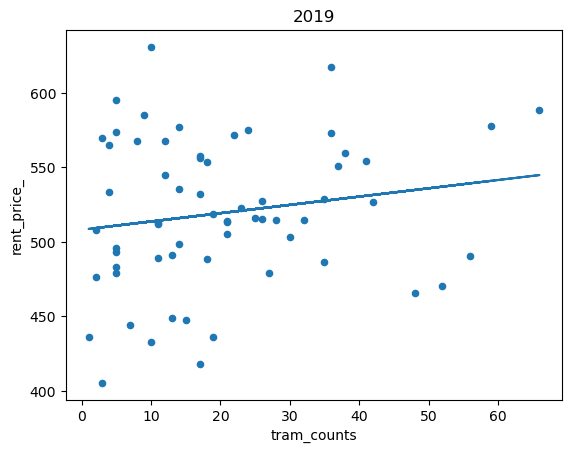

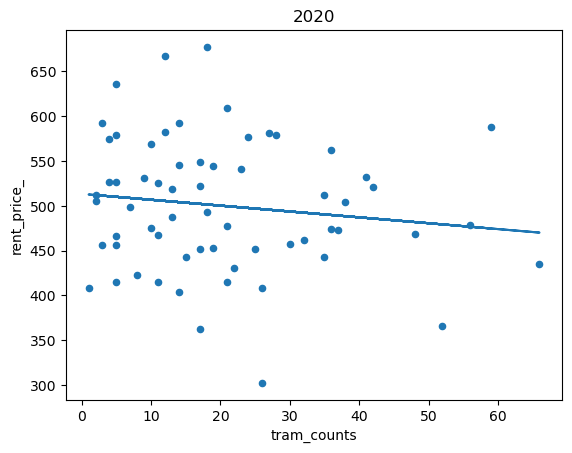

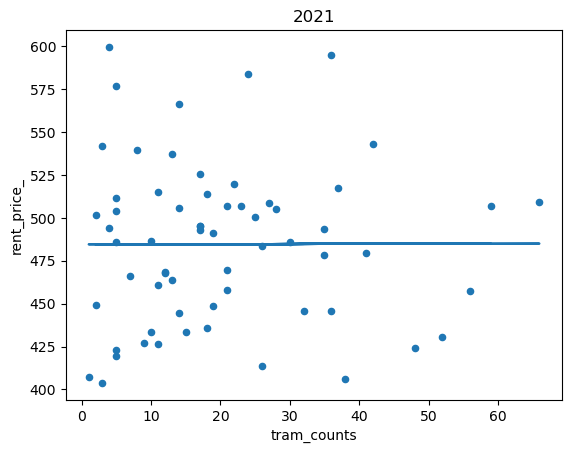

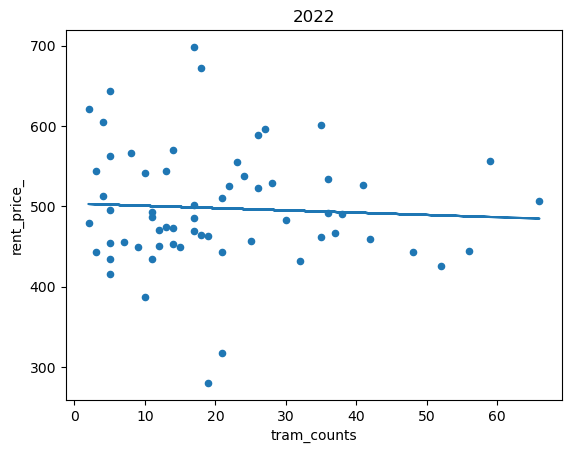

In [121]:
# linear regression for tram_counts

for year in years:
    # fit linear regression model
    X = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_']].dropna()['tram_counts'].astype('float')
    X = sm.add_constant(X)
    y = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_']].dropna()['rent_price_']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_']].dropna().plot(
    x='tram_counts', y='rent_price_', kind = 'scatter')
    
    # plot lr model
    X = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_']].dropna()['tram_counts']
    ax.plot(X, results.params.const + results.params.tram_counts * X)
    
    ax.set_title(label=str(year))

In [127]:
df_plot

,suburb,Year,rent_price_,train_counts,tram_counts,bus_counts,total_sc,rent_price_log
10,ABBOTSFORD,2015,586.428571,2.0,4.0,15.0,21.0,6.374051
11,ABBOTSFORD,2016,529.375000,2.0,4.0,15.0,21.0,6.271697
12,ABBOTSFORD,2017,476.000000,2.0,4.0,15.0,21.0,6.165418
13,ABBOTSFORD,2018,573.611111,2.0,4.0,15.0,21.0,6.351952
14,ABBOTSFORD,2019,565.052632,2.0,4.0,15.0,21.0,6.336919
...,...,...,...,...,...,...,...,...
3410,YARRAVILLE,2018,550.833333,1.0,<NA>,81.0,82.0,6.311432
3411,YARRAVILLE,2019,534.095238,1.0,<NA>,81.0,82.0,6.280574
3412,YARRAVILLE,2020,470.705882,1.0,<NA>,81.0,82.0,6.154233
3413,YARRAVILLE,2021,618.200000,1.0,<NA>,81.0,82.0,6.426812


In [126]:
# log transformation

import numpy as np
df_plot['rent_price_log'] = np.log(df_plot['rent_price_'])


/tmp/ipykernel_3907/4122820455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['rent_price_log'] = np.log(df_plot['rent_price_'])


### According to transportation type

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0019      0.001      3.874      0.000       0.001       0.003


Text(0.5, 1.0, '2022')

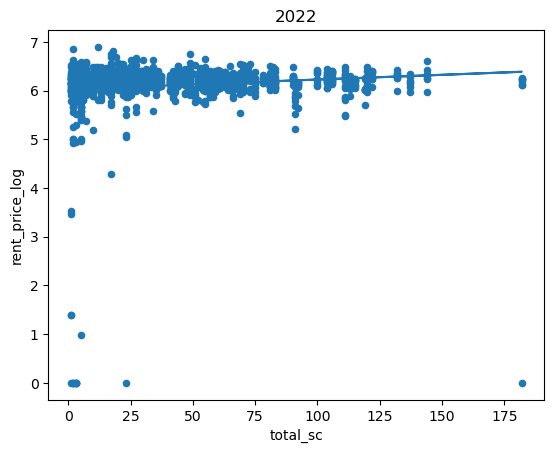

In [129]:
# fit linear regression model
X = df_plot[['total_sc', 'rent_price_log']].dropna()['total_sc']
X = sm.add_constant(X)
y = df_plot[['total_sc', 'rent_price_log']].dropna()['rent_price_log']

model = sm.OLS(y,X)
results = model.fit()
    
# print hypothesis test result
print(results.t_test([0,1]))
    
# plot data
ax = df_plot[['total_sc', 'rent_price_log']].dropna().plot(
x='total_sc', y='rent_price_log', kind = 'scatter')
    
# plot lr model
X = df_plot[['total_sc', 'rent_price_log']].dropna()['total_sc']
ax.plot(X, results.params.const + results.params.total_sc * X)
    
ax.set_title(label=str(year))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0248      0.017      1.470      0.142      -0.008       0.058


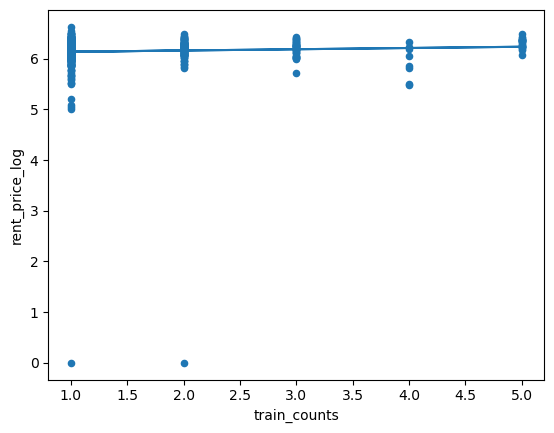

In [152]:
# fit linear regression model
X = df_plot[['train_counts', 'rent_price_log']].dropna()['train_counts'].astype('float')
X = sm.add_constant(X)
y = df_plot[['train_counts', 'rent_price_log']].dropna()['rent_price_log']

model = sm.OLS(y,X)
results = model.fit()
    
# print hypothesis test result
print(results.t_test([0,1]))
    
# plot data
ax = df_plot[['train_counts', 'rent_price_log']].dropna().plot(
x='train_counts', y='rent_price_log', kind = 'scatter')
    
# plot lr model
X = df_plot[['train_counts', 'rent_price_log']].dropna()['train_counts']
ax.plot(X, results.params.const + results.params.train_counts * X)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0017      0.001      3.002      0.003       0.001       0.003


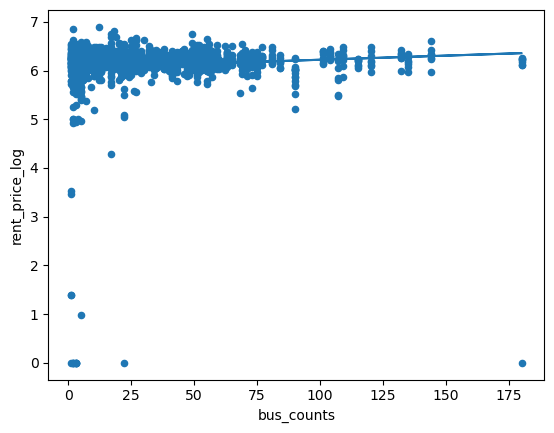

In [153]:
# fit linear regression model
X = df_plot[['bus_counts', 'rent_price_log']].dropna()['bus_counts'].astype('float')
X = sm.add_constant(X)
y = df_plot[['bus_counts', 'rent_price_log']].dropna()['rent_price_log']

model = sm.OLS(y,X)
results = model.fit()
    
# print hypothesis test result
print(results.t_test([0,1]))
    
# plot data
ax = df_plot[['bus_counts', 'rent_price_log']].dropna().plot(
x='bus_counts', y='rent_price_log', kind = 'scatter')
    
# plot lr model
X = df_plot[['bus_counts', 'rent_price_log']].dropna()['bus_counts']
ax.plot(X, results.params.const + results.params.bus_counts * X)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0003      0.000      0.797      0.426      -0.000       0.001


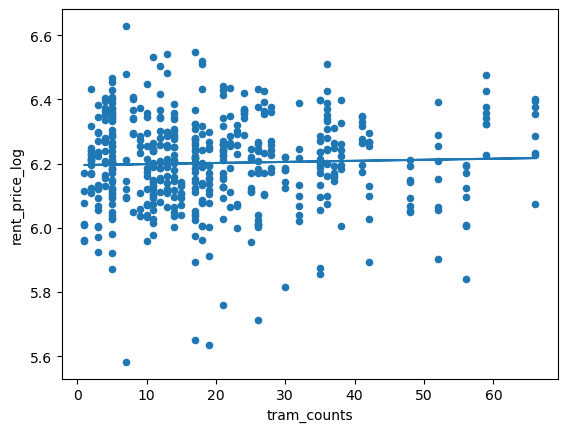

In [154]:
# fit linear regression model
X = df_plot[['tram_counts', 'rent_price_log']].dropna()['tram_counts'].astype('float')
X = sm.add_constant(X)
y = df_plot[['tram_counts', 'rent_price_log']].dropna()['rent_price_log']

model = sm.OLS(y,X)
results = model.fit()
    
# print hypothesis test result
print(results.t_test([0,1]))
    
# plot data
ax = df_plot[['tram_counts', 'rent_price_log']].dropna().plot(
x='tram_counts', y='rent_price_log', kind = 'scatter')
    
# plot lr model
X = df_plot[['tram_counts', 'rent_price_log']].dropna()['tram_counts']
ax.plot(X, results.params.const + results.params.tram_counts * X)
    


In [136]:
df_clean

,total_sc,rent_price_log
17,21.0,6.240128
38,18.0,6.207080
60,20.0,6.162019
107,10.0,6.476972
126,52.0,6.179028
...,...,...
3329,13.0,6.040255
3347,20.0,6.188156
3363,35.0,6.396930
3380,5.0,6.156979


In [144]:
from scipy import stats

df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)]

,total_sc,rent_price_log
17,21.0,6.240128
38,18.0,6.207080
60,20.0,6.162019
107,10.0,6.476972
126,52.0,6.179028
...,...,...
3329,13.0,6.040255
3347,20.0,6.188156
3363,35.0,6.396930
3380,5.0,6.156979


### Group by year

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0024      0.001      1.958      0.052   -1.96e-05       0.005
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0031      0.002      1.972      0.050   -4.42e-06       0.006
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0011      0.001      2.054      0.042    4.41e-05       0.002
2018
                             Tes

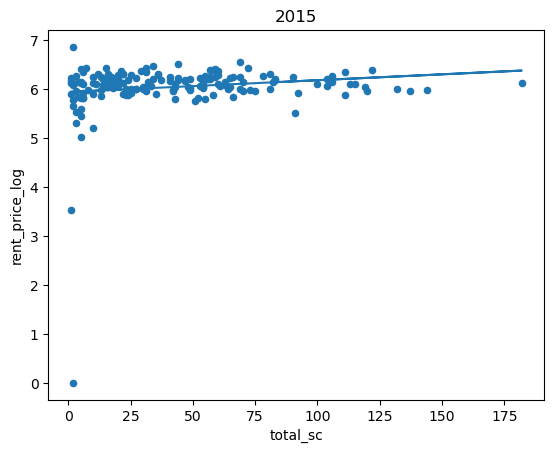

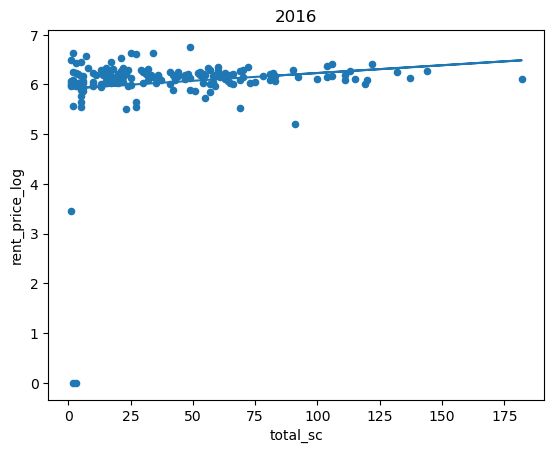

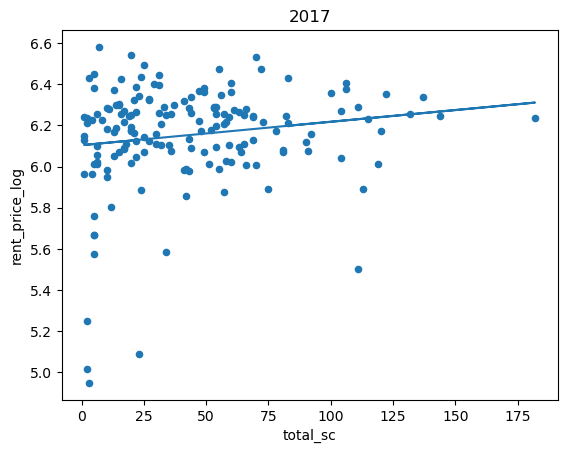

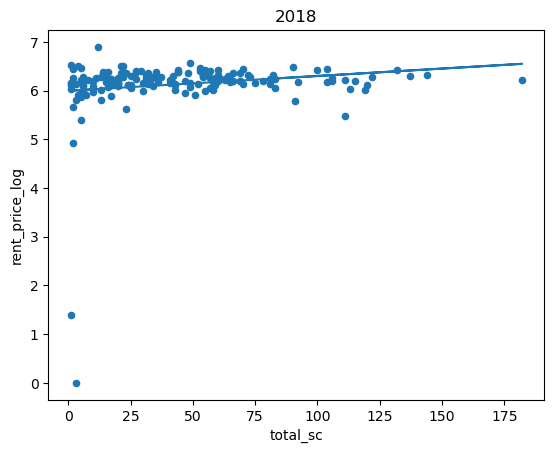

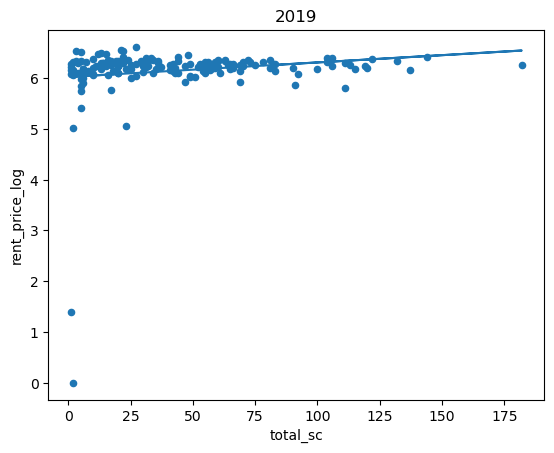

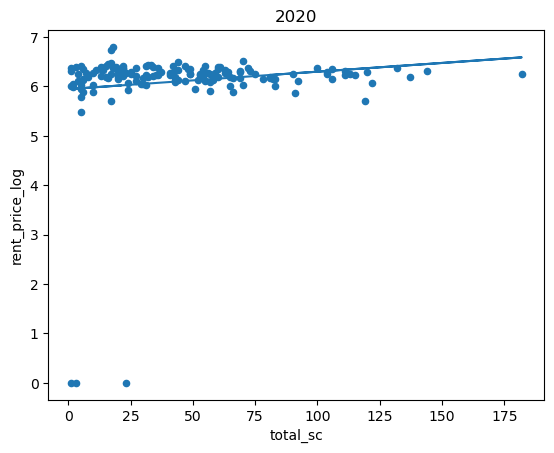

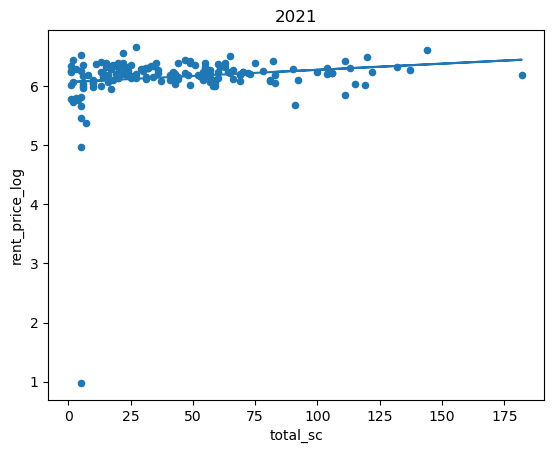

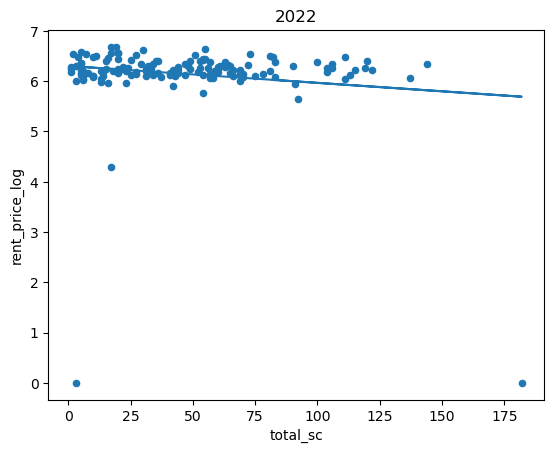

In [146]:
# linear regression for total counts

for year in years:
    # outlier
    df_clean = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_log']].dropna()

    
    
    # fit linear regression model    
    X = df_clean['total_sc']
    X = sm.add_constant(X)
    y = df_clean['rent_price_log']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_clean.plot(
    x='total_sc', y='rent_price_log', kind = 'scatter')
    
    # plot lr model
    X = df_clean['total_sc']
    ax.plot(X, results.params.const + results.params.total_sc * X)
    
    ax.set_title(label=str(year))

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0008      0.001      1.387      0.167      -0.000       0.002
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0003      0.001      0.617      0.538      -0.001       0.001
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0004      0.000      0.822      0.412      -0.001       0.001
2018
                             Tes

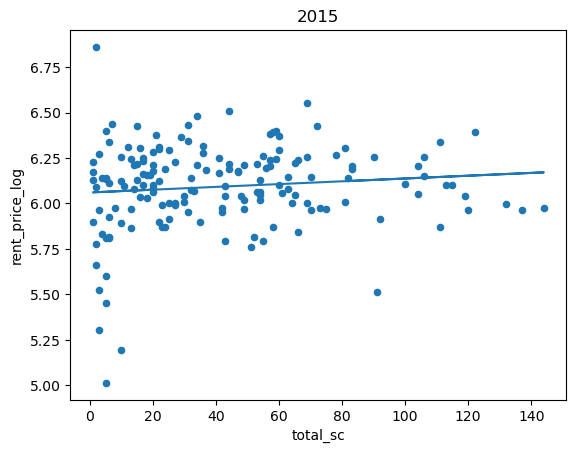

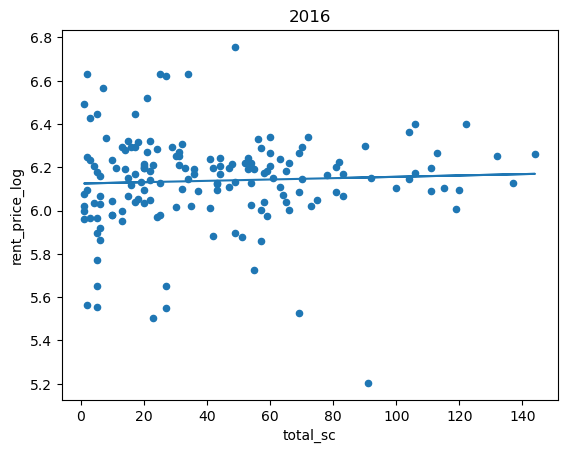

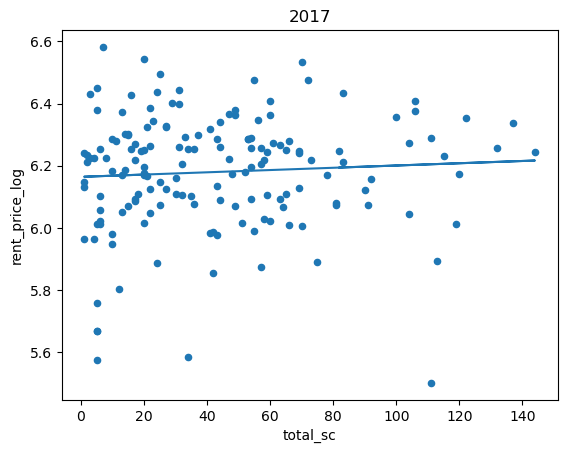

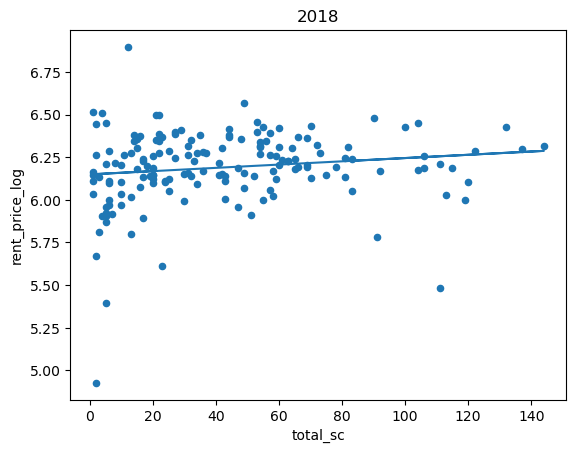

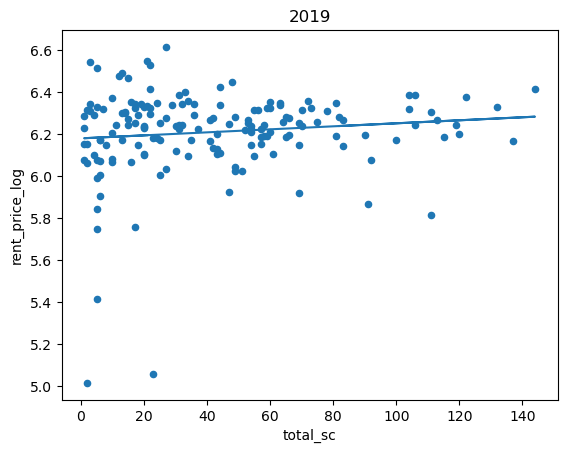

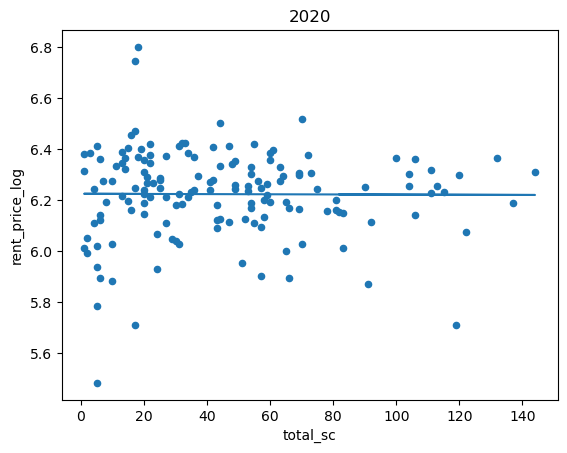

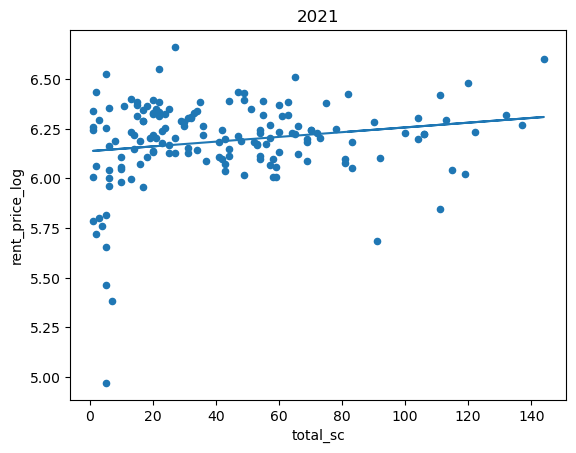

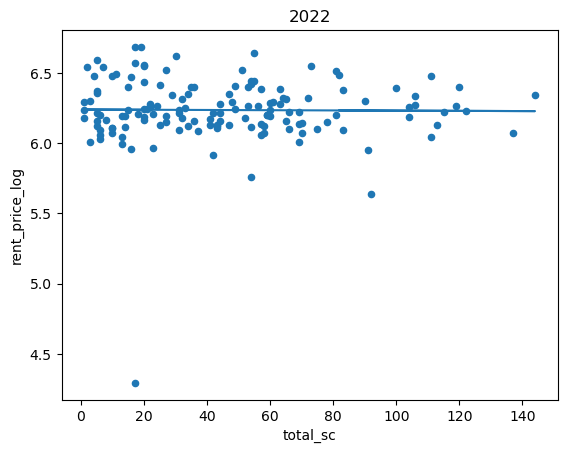

In [145]:
# linear regression for total counts

for year in years:
    # outlier
    df_clean = df_plot[df_plot['Year']==year][['total_sc', 'rent_price_log']].dropna()
    df_clean = df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)]
    
    
    # fit linear regression model    
    X = df_clean['total_sc']
    X = sm.add_constant(X)
    y = df_clean['rent_price_log']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_clean.plot(
    x='total_sc', y='rent_price_log', kind = 'scatter')
    
    # plot lr model
    X = df_clean['total_sc']
    ax.plot(X, results.params.const + results.params.total_sc * X)
    
    ax.set_title(label=str(year))
    
    

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0502      0.027      1.860      0.067      -0.004       0.104
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0630      0.023      2.695      0.009       0.016       0.110
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0412      0.026      1.602      0.113      -0.010       0.092
2018
                             Tes

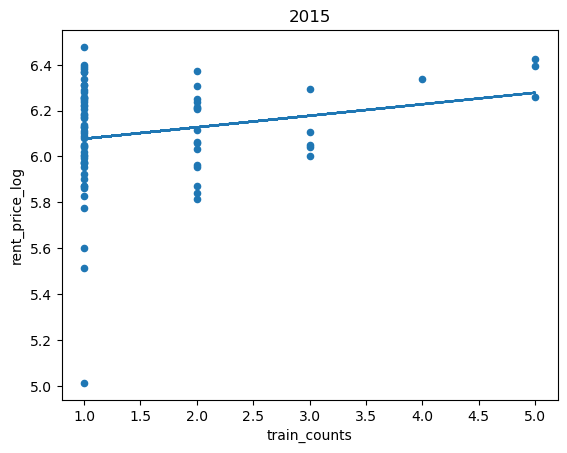

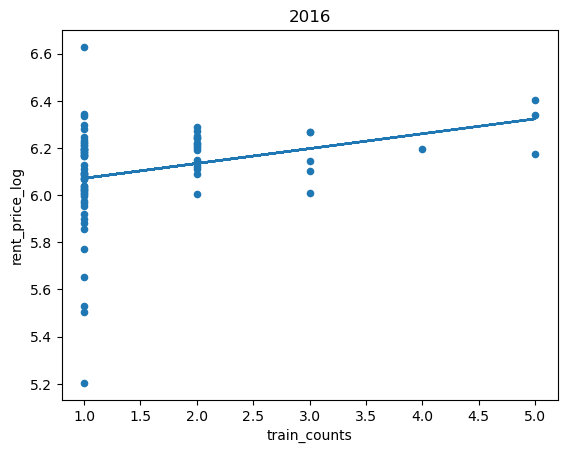

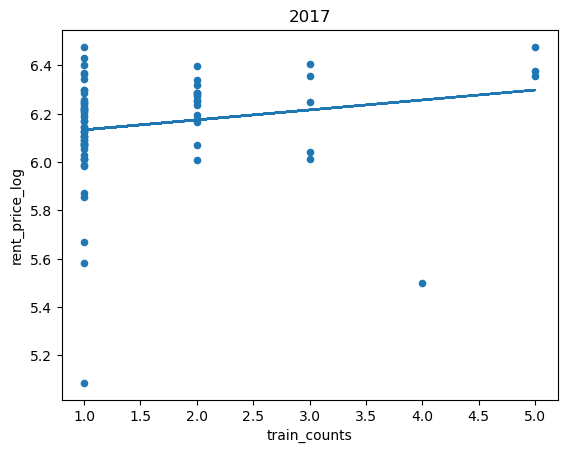

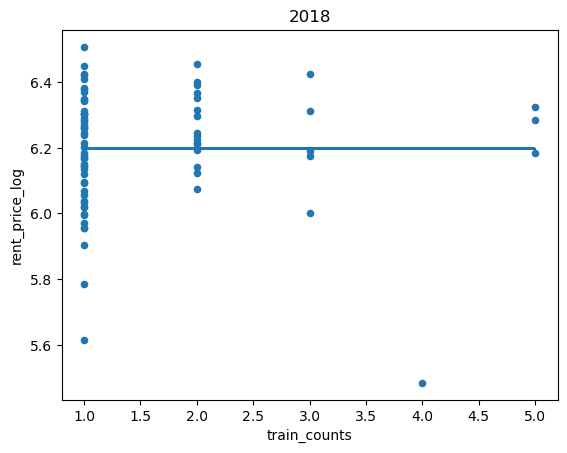

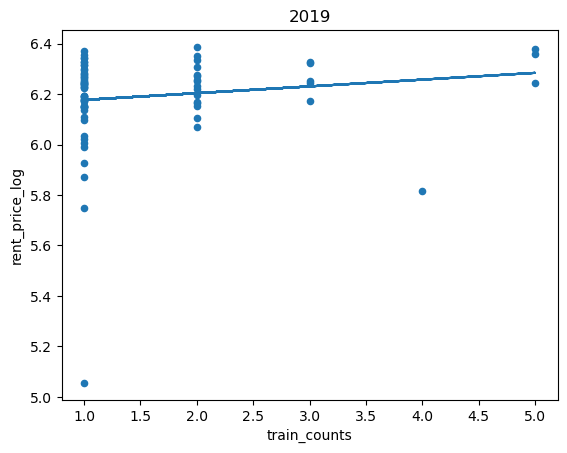

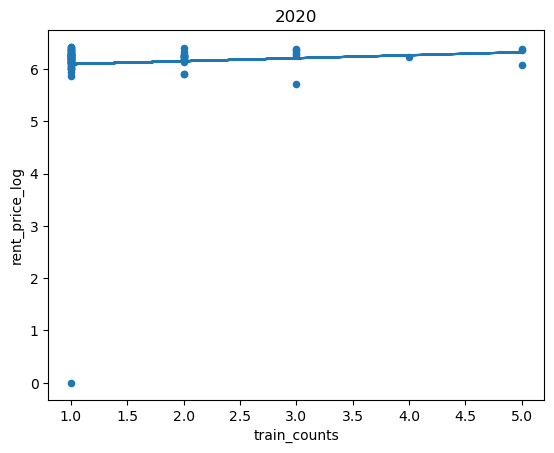

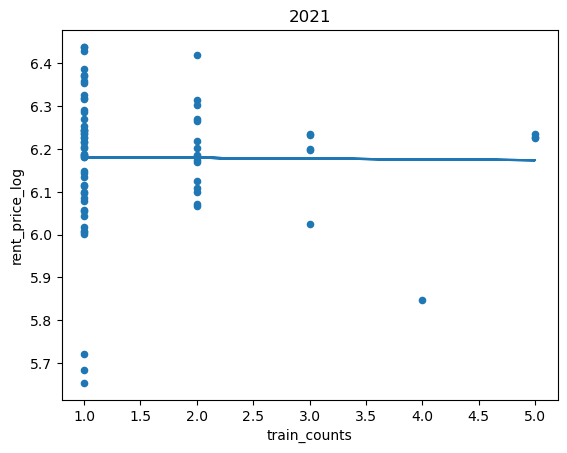

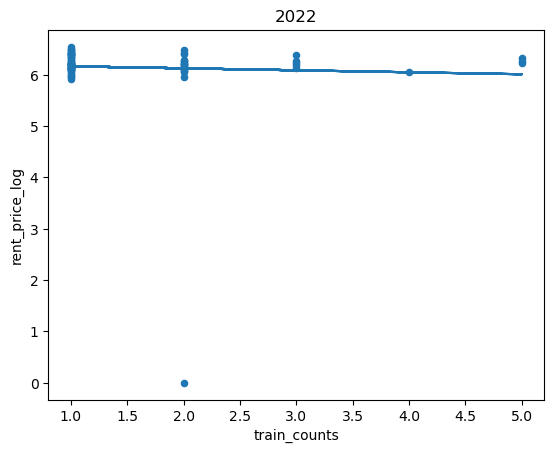

In [130]:
# linear regression for train_counts

for year in years:
    # fit linear regression model
    X = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_log']].dropna()['train_counts'].astype('float')
    X = sm.add_constant(X)
    y = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_log']].dropna()['rent_price_log']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_log']].dropna().plot(
    x='train_counts', y='rent_price_log', kind = 'scatter')
    
    # plot lr model
    X = df_plot[df_plot['Year']==year][['train_counts', 'rent_price_log']].dropna()['train_counts']
    ax.plot(X, results.params.const + results.params.train_counts * X)
    
    ax.set_title(label=str(year))

2015
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0015      0.001      1.157      0.252      -0.001       0.004
2016
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0008      0.001      0.662      0.510      -0.002       0.003
2017
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0003      0.001      0.184      0.855      -0.003       0.003
2018
                             Tes

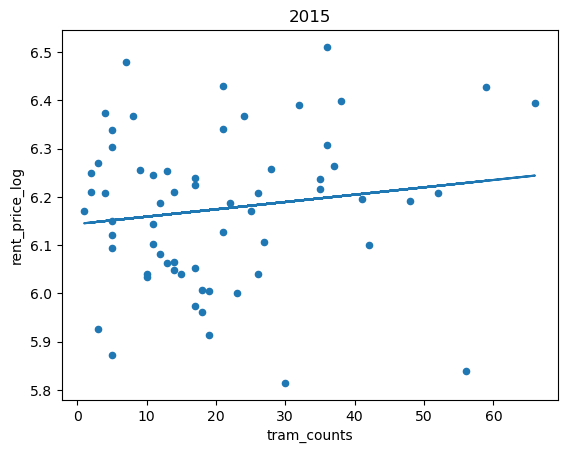

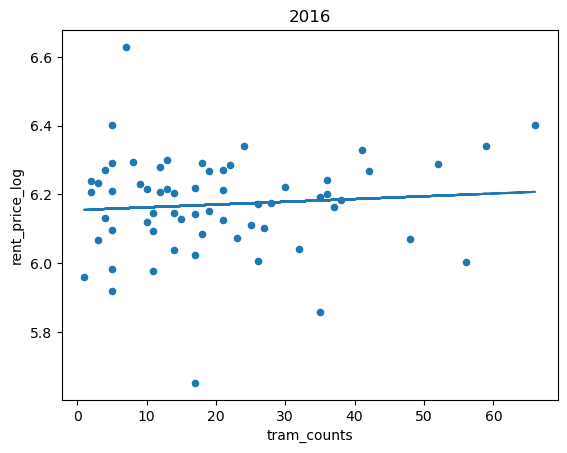

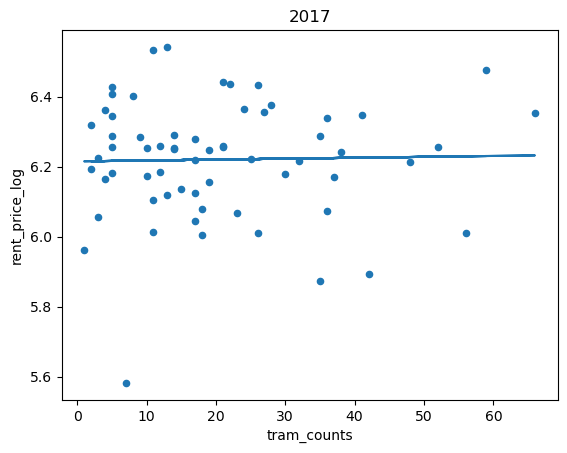

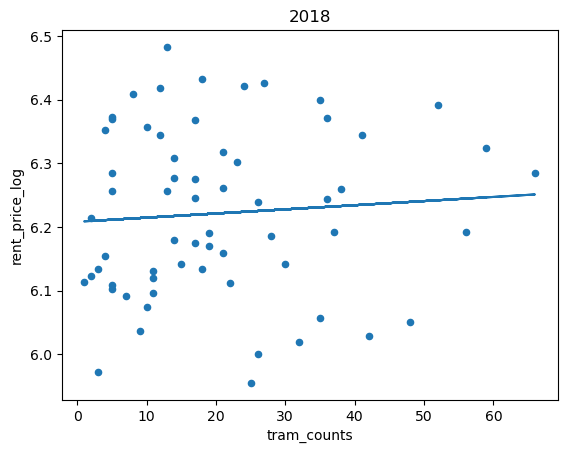

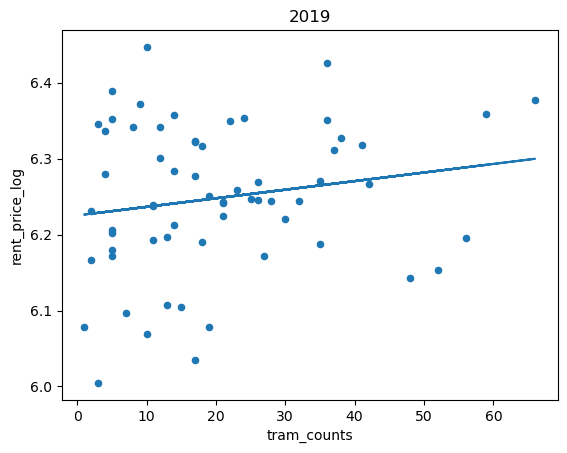

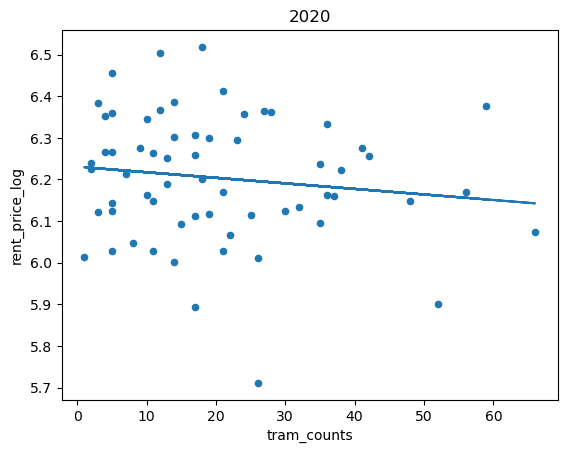

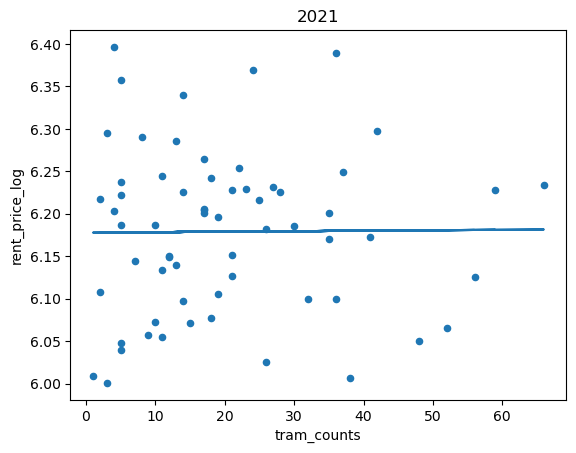

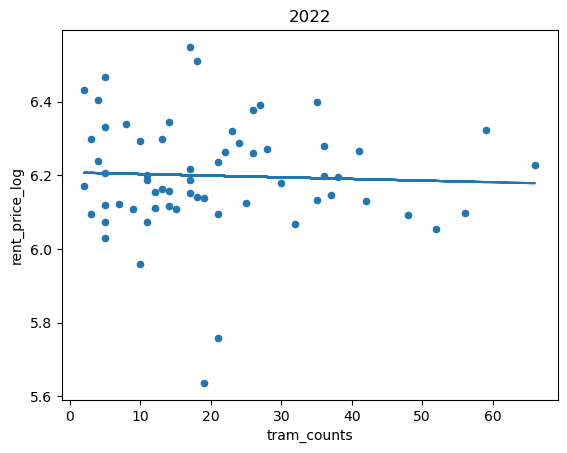

In [131]:
# linear regression for tram_counts

for year in years:
    # fit linear regression model
    X = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_log']].dropna()['tram_counts'].astype('float')
    X = sm.add_constant(X)
    y = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_log']].dropna()['rent_price_log']

    model = sm.OLS(y,X)
    results = model.fit()
    
    # print hypothesis test result
    print(year)
    print(results.t_test([0,1]))
    
    # plot data
    ax = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_log']].dropna().plot(
    x='tram_counts', y='rent_price_log', kind = 'scatter')
    
    # plot lr model
    X = df_plot[df_plot['Year']==year][['tram_counts', 'rent_price_log']].dropna()['tram_counts']
    ax.plot(X, results.params.const + results.params.tram_counts * X)
    
    ax.set_title(label=str(year))